# Inizalizzazione Ambiente

## Importazione Librerie

In [3]:
# Basic libs
import pandas as pd
import numpy as np
import math

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Surprise
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import cross_validate

#NLTK
from nltk.cluster import KMeansClusterer
from nltk import cluster
from nltk.cluster import euclidean_distance

# scikit learn
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics.pairwise import cosine_similarity

# NetworkX
import networkx as nx

# Warnings
import warnings
warnings.filterwarnings('ignore')


ImportError: dlopen(/Users/davidegrandesso/miniforge3/envs/env_sup/lib/python3.12/site-packages/surprise/similarities.cpython-312-darwin.so, 0x0002): tried: '/Users/davidegrandesso/miniforge3/envs/env_sup/lib/python3.12/site-packages/surprise/similarities.cpython-312-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64')), '/System/Volumes/Preboot/Cryptexes/OS/Users/davidegrandesso/miniforge3/envs/env_sup/lib/python3.12/site-packages/surprise/similarities.cpython-312-darwin.so' (no such file), '/Users/davidegrandesso/miniforge3/envs/env_sup/lib/python3.12/site-packages/surprise/similarities.cpython-312-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64'))

### Parametri Grafici

In [24]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['figure.dpi'] = 80
sns.set_context("talk")
sns.set_style("ticks")

#### `sf`

`sf` è una variabile boolena che se impostata a True mi permette di salvare i grafici

In [25]:
sf = False

#### `saveImg`

Funzione utile al salvataggio dell'immagine per nome e per cartella, tutte saranno nella cartella img  

In [26]:
def saveImg(name, fold, sf):
    if sf:
        if fold != "":
            fold += "/" 
        location = "img/" + fold + name + ".png"
        plt.savefig(location)
        location = "img/" + fold + "trs/" + name + ".png"
        plt.savefig(location, transparent = True)

## Caricamento dei dati

array contenete i nomi dei file dei dataset da leggere

### `arr_nomi_file`

In [27]:
#arr_nomi_file = ["data", "info", "item", "genre", "user", "occupation"]
arr_nomi_file = ["data", "user", "item"]

### `colonne`

dizionario contentene tutte le colonne di ogni file 

In [28]:
colonne = {}
colonne["data"] = ["user id", "item id", "rating", "timestamp"]
colonne["user"] = ["user id", "age", "gender", "occupation", "zip code"]
colonne["item"] = ["movie id", "movie title", "release date", 
                    "video release date", "IMDb URL", "unknown",
                    "Action", "Adventure", "Animation", "Children's", 
                    "Comedy", "Crime", "Documentary", "Drama", "Fantasy",
                    "Film-Noir", "Horror", "Musical", "Mystery", 
                    "Romance ", "Sci-Fi", "Thriller", "War", "Western"]



### `where`

stringa che mi indica da dove scarico i file 

In [29]:
where = "https://files.grouplens.org/datasets/movielens/ml-100k/u." # Online
#where = "ml-100k/u." # Offline nel caso avessi scaricato la cartella dove ci troviamo a lavorare 

### `data`

dizionario dove la chiave è il suffiso del fìnome del file che leggo mentre il valore del dataframe letto dal rispettivo file

In [30]:
data = {}
for nome in arr_nomi_file[:3]:
    if nome == "data":
        #data[nome] = pd.read_csv(where + nome, sep = "\t", names = colonne[nome])
        data[nome] = pd.read_csv(where + nome, sep = "\t", names = colonne[nome], index_col = colonne[nome][:2])
    else:
        data[nome] = pd.read_csv(where + nome, sep = "|", 
        names = colonne[nome], encoding = "latin-1", index_col = colonne[nome][0])

In [31]:
data["Complete"] = data["data"].copy()
for nome in arr_nomi_file[1:3]:
    data["Complete"] = data["Complete"].join(data[nome], on = nome + " id")

In [32]:
nomi = {
    "user" : "Utenti",
    "Complete" : "Completo",
    "item" : "Film",
    "data" : "Ratings"
}

In [33]:
for el in arr_nomi_file:
    print("-" * 18 + " " + nomi[el] + " " + "-" * 18)
    display(data[el])
    print("Rows: " + str(len(data[el].index)))

------------------ Ratings ------------------


,,rating,timestamp
user id,item id,,
196,242,3,881250949
186,302,3,891717742
22,377,1,878887116
244,51,2,880606923
166,346,1,886397596
...,...,...,...
880,476,3,880175444
716,204,5,879795543
276,1090,1,874795795


Rows: 100000
------------------ Utenti ------------------


,age,gender,occupation,zip code
user id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
...,...,...,...,...
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229


Rows: 943
------------------ Film ------------------


,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Rows: 1682


## Data Acquisation

Il dataset preso in considerazione è [Movielens 100k](https://files.grouplens.org/datasets/movielens/ml-100k/), esso contiene:

* 100,000 valutazioni (1-5) da 943 users su 1682 movies. 
* Ogni utente ha valutato almeno 20 film. 
* Semplici informazioni demografiche per gli utenti (età, genere, occupazione, zip)

I file contenenti le principali informazioni sono:
* u.data
* u.item
* u.user

### Informazioni principali

#### u.data

Il dataset completo di dati u contiene le 100000 valutazioni di 943 utenti su 1682 item.

Ogni utente ha valutato almeno 20 film.  

Gli utenti e gli item sono numerati consecutivamente da 1. 

I dati sono ordinati.

Questa è un elenco separato di:

	        user id | item id | rating | timestamp. 

Ogni colonna è separata dal simbolo di tabulazioni \(`\t`\)

**user id** --> Id univoco dell'utente che ha effettuato la valutazione. (da 1 a 943)

**item id** --> Id univoco del film che è stato valutato. (da 1 a 1682)

**rating** --> Valutazione fatta dall'utente sul film (da 1 a 5)

**timestamp** --> Il momento in cui è stata fatta la valutazione (in secondi unix a partire da 1/1/1970)

#### u.item

in questo file troviamo nformazioni sugli item (film);

questo è un elenco separato dal simbolo |:

            movie id | movie title | release date | video release date | IMDb URL |
            unknown | Action | Adventure | Animation | Children's | Comedy |
            Crime | Documentary | Drama | Fantasy | Film-Noir | Horror |
            Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western |

Gli ultimi 19 campi sono i generi dei, un 1 indica che il film
è di quel genere, uno 0 indica che non lo è; i film possono essere in
diversi generi contemporaneamente.
Gli id dei film sono quelli usati nel set di dati u.data.

**movie id** --> Id univoco del film che è stato valutato. (da 1 a 1682)

**movie title** --> Titolo del film (stringa)

**release date** --> Data di uscita del film (formato day-mount-year dove il mese è scritto come abbreviazione e non come numero)

**video release date** --> data di rilascio del video

**IMDb URL** --> URL del film al database di [IMDb](https://www.imdb.com/)

                unknown | Action | Adventure | Animation | Children's | Comedy |
                Crime | Documentary | Drama | Fantasy | Film-Noir | Horror |
                Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western |

Questi ultimi 19 campi sono i generi dei film:
* 1 indica che il film è di quel genere
* 0 indica che non lo è
  
I film possono essere in diversi generi contemporaneamente.

#### u.user

Informazioni demografiche sugli utenti.

Questo è un elenco separato dal simbolo | di:

                user id | age | gender | occupation | zip code

Ogni colonna è separata dal simbolo |

Gli id degli utenti sono quelli usati nel dataset u.data.

**user id** --> Id univoco dell'utente che ha effettuato la valutazione. (da 1 a 943)

**age** --> Quanti anni ha l'utente 

**gender** --> Genere dell'utente ("M"/"F")

**occupation** --> Occupazione dell'utente

**zip code** --> Codice postale (USA)

### Altri file informativi

Nella cartella troviamo anche altri file informativi ovvero 

* u.info --> Il numero di utenti, di item e di valutazioni
* u.genre --> Una lista dei generi possibili dei film
* u.occupation --> Una lista delle occupazioni possibili degli utenti

### File training e test

Nella cartella possiamo anche trovare altri file .base e .test

I primi sono file di training se mentre i secondi di test set


I file da u1 a u5 sono suddivisioni 80%/20% dei dati di u.data

Ognuno di u1, ..., u5 ha insiemi di test disgiunti;

questo se per 5 volte la convalida incrociata (dove si ripete l'esperimento con ogni set di training e di test e la media dei risultati).



Invece i file ua e ub un training set e un test set con esattamente 10 valutazioni per utente nel set di test.  

I set ua.test e ub.test sono disgiunti.

Il file mku.sh è uno script di shell per generare tutti i dataset u da u.data.

# Analisi esplorativa

Possibili analisi esplorative da fare, abbiamo 3 dataset e di conseguenza dobbiamo lavare su tutti qesti dataset in modo completo, 

Sugli user abbiamo 3 dati significativi , il genere, l'età e l'occupazione 
possiamo vedere l'età media generale, per sesso, per occupazione andando sempre nello specifico
è interessante vedere la disposizione degli utenti in base alla loro "quantità"

sui film 

## Anaslisi sulle valutazioni degli user

## Funzioni utili

### `maxSeries`

questa funzione prende in input una serie e restituisce una tupla di due elementi, il primo elemento è l'indice del valore valore massimo mentre il secondo elemento è il rispettivo valore massimo

In [34]:
def maxSeries (ser):
    max = ser.index[0]
    for el in ser.index:
        if ser[el] > ser[max]:
            max = el
    return (max, ser[max])

maxSeries(data["Complete"].groupby("age").rating.count())


(27, 6423)

### `minSeries`

questa funzione prende in input una serie e restituisce una tupla di due elementi, il primo elemento è l'indice del valore valore minimo mentre il secondo elemento è il rispettivo valore minimo

In [35]:
def minSeries (ser):
    min = ser.index[0]
    for el in ser.index:
        if ser[el] < ser[min]:
            min = el
    return (min, ser[min])

### Età

In [36]:
print(data["user"]["age"].mean())
print(data["Complete"]["age"].mean())

34.05196182396607
32.96985


notiamo che l'età media degli utenti è più alta rispetti a quella delle votazioni, questo significa che chi vota solitamente ha un età più bassa rispetto alla media anche se non ci distacchiamo più di tanto

Proviamo a fare dei boxplot e degli hist plot per capire come sono divisi
 

In [37]:
print("Standard deviation: " + str(data["user"]["age"].std()))
print("Standard deviation: " + str(data["Complete"]["age"].std()))

Standard deviation: 12.192739733059044
Standard deviation: 11.56262331481379


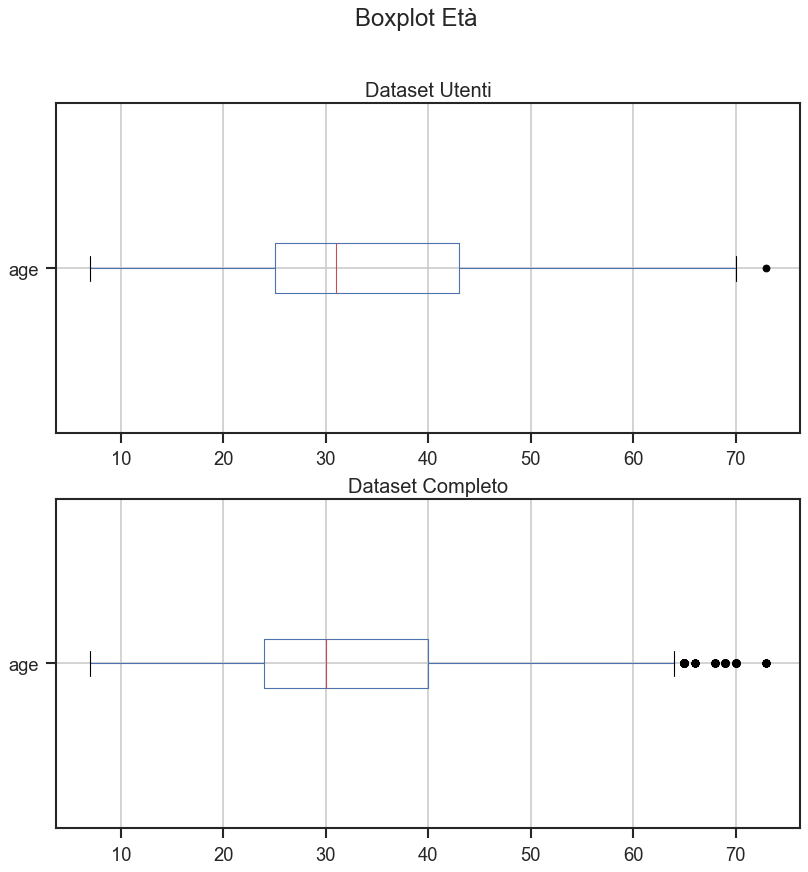

In [38]:
plt.rcParams['figure.figsize'] = [12, 12]
j = 211
for el in ["user", "Complete"]:
    plt.subplot(j)
    data[el].boxplot(column = "age", ax = plt.subplot(j), vert = False, sym = "k")
    plt.title("Dataset " + nomi[el])
    j += 1
plt.suptitle("Boxplot Età")

#Save
saveImg("Box_Age", "", sf)

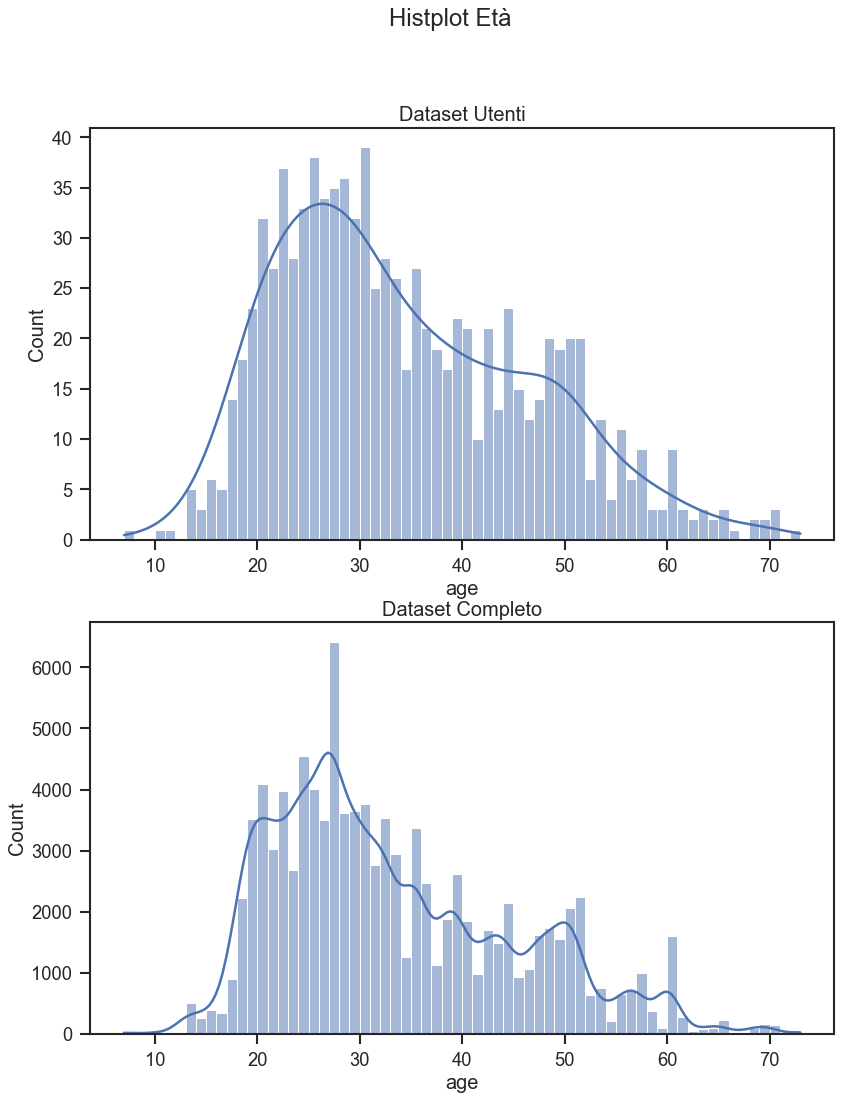

In [39]:
plt.rcParams['figure.figsize'] = [12, 15]
j = 211
for el in ["user", "Complete"]:
    plt.subplot(j)
    sns.histplot(data = data[el] , x = data[el]["age"], stat = "count", kde = True, binwidth = 1)
    #data[el].plot.hist( ax = plt.subplot(j))
    plt.title("Dataset " + nomi[el])
    j += 1
plt.suptitle("Histplot Età")

#Save
saveImg("Hist_Age", "", sf)

In [40]:
mn = maxSeries(data["Complete"].groupby("age").count()["rating"])
print("Gli utenti di " + str(mn[0]) + " anni hanno valuato più film " + str(mn[1]))
mn = minSeries(data["Complete"].groupby("age").count()["rating"])
print("Gli utenti di " + str(mn[0]) + " anni hanno valuato meno film " + str(mn[1]))

Gli utenti di 27 anni hanno valuato più film 6423
Gli utenti di 11 anni hanno valuato meno film 27


In [41]:
c = data["Complete"].groupby("age").count()
u = data["user"].groupby("age").count()
media = {}
for i in u.index:
    media[i] = c.loc[i]["gender"] / u.loc[i]["gender"]
media = pd.DataFrame.from_dict(media, orient = "index")
media.index.name = "age"
media.rename(columns = { 0 :"mean ratings"}, inplace = True)
media 

,mean ratings
age,
7,43.0
10,31.0
11,27.0
13,99.4
14,88.0
...,...
66,37.0
68,46.0
69,78.0


In [42]:
mn = maxSeries(media["mean ratings"])
print("Gli utenti di " + str(mn[0]) + " anni hanno mediamente valuato più film " + str(mn[1]))
mn = minSeries(media["mean ratings"])
print("Gli utenti di " + str(mn[0]) + " anni hanno mediamente valuato meno film " + str(mn[1]))

Gli utenti di 27 anni hanno mediamente valuato più film 183.5142857142857
Gli utenti di 62 anni hanno mediamente valuato meno film 23.0


al fine di rendere il grafico più leggibile "riempiamo" la tabela con le età mancanti

In [43]:
for i in range (media.index[0], media.index[-1]):
    if not(i in media.index):
        media.loc[i] = 0
media.sort_index(inplace = True)
media

,mean ratings
age,
7,43.0
8,0.0
9,0.0
10,31.0
11,27.0
...,...
69,78.0
70,47.0
71,0.0


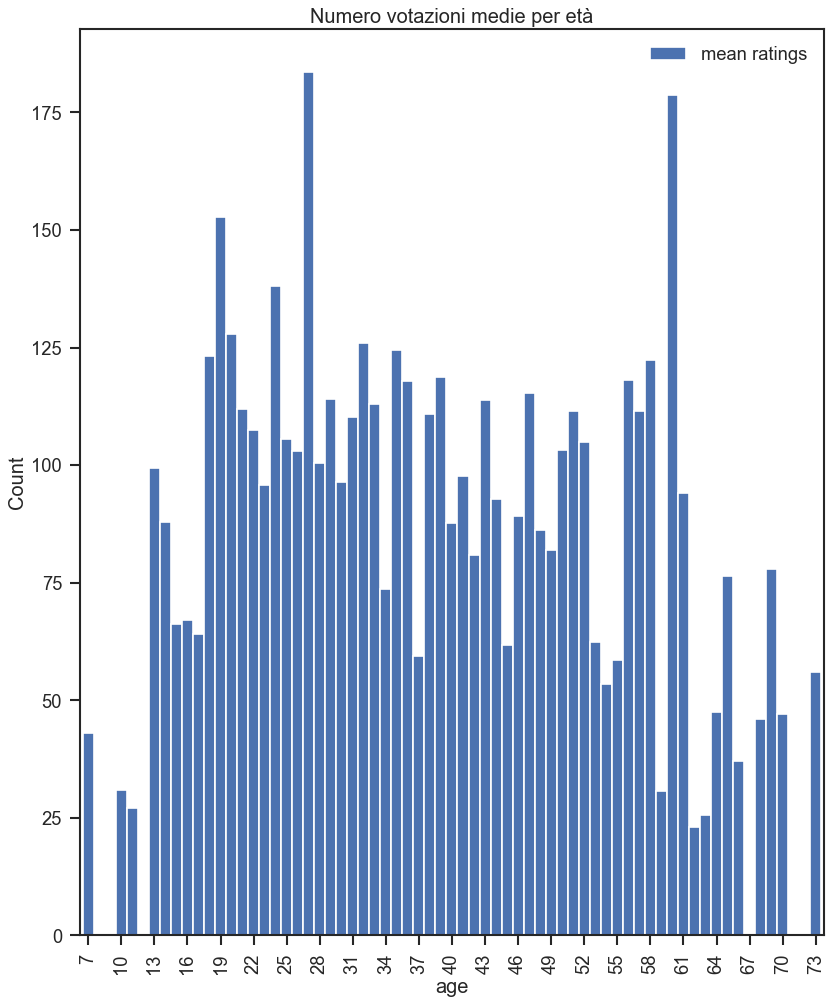

In [44]:
fig, ax = plt.subplots()
media.plot.bar(width = 1, ax = ax)
ax.set_xticks(range(0 ,len(media.index), 3), labels = range(media.index[0], media.index[-1]+ 1,3))
plt.title("Numero votazioni medie per età")
plt.ylabel("Count")
#Save
saveImg("meanCountRating_Age", "", sf)

### Genere

il primo controllo può essere simile a quello precedente ovvero vedere quanto è divisa la popolazione rispetto al sesso e quanto questa è divisa nella votazione, così da vedere quale sesso ha effettuato proporzioanlmente più o meno votazioni

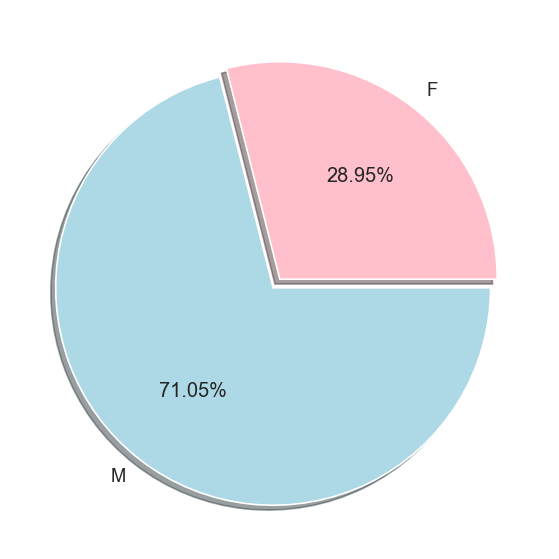

In [45]:
plt.rcParams['figure.figsize'] = [9, 9]
u = data["user"].groupby("gender")
u.count()
plt.pie(u.count()["age"], labels = u.indices.keys(), colors=["pink", "lightblue"], autopct='%.2f%%', explode = (0, 0.05), shadow = True)

#Save
saveImg("genderUser", "", sf)

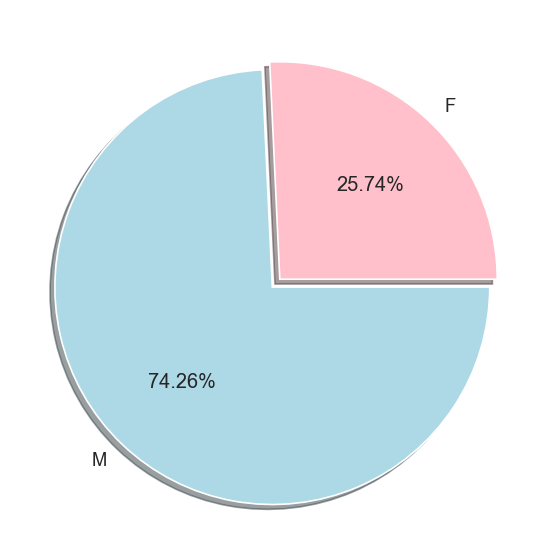

In [46]:
c = data["Complete"].groupby("gender")
c.count()
plt.pie(c.count()["age"], labels = c.indices.keys(), colors=["pink", "lightblue"], autopct='%.2f%%', explode = (0, 0.05), shadow = True)

#Save
saveImg("genderComplete", "", sf)

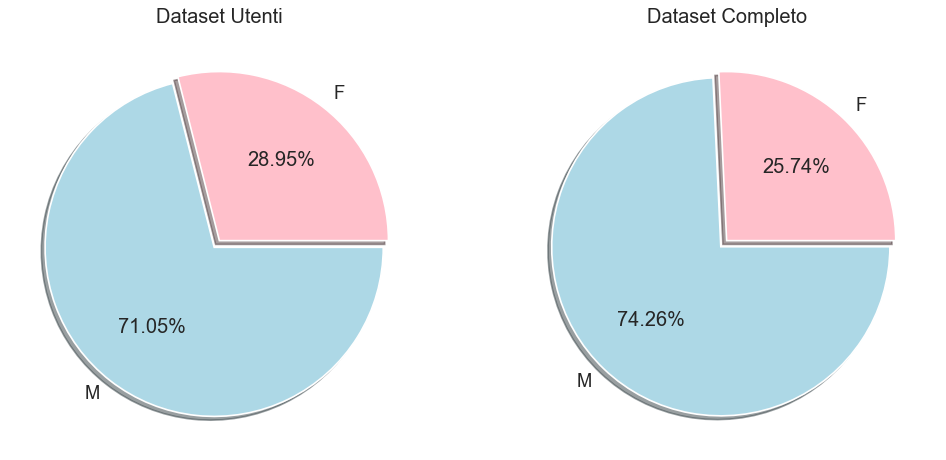

In [47]:
plt.rcParams['figure.figsize'] = [15, 7]
j = 121
for el in ["user", "Complete"]:
    plt.subplot(j)
    x = data[el].groupby("gender")
    x.count()
    plt.pie(x.count()["age"], labels = x.indices.keys(), colors=["pink", "lightblue"], autopct='%.2f%%', explode = (0, 0.05), shadow = True)
    plt.title("Dataset " + nomi[el])
    j += 1

#Save
saveImg("gender", "", sf)

In [48]:
x = u.count()["age"]/u.count().sum()["age"]
print("l'utenza mascile presente nella nostra popolazione è il " + str(round(x["M"]*100, 2)) + "%")
print("l'utenza femminile presente nella nostra popolazione è il " + str(round(x["F"]*100, 2)) + "%")

l'utenza mascile presente nella nostra popolazione è il 71.05%
l'utenza femminile presente nella nostra popolazione è il 28.95%


In [49]:
x = c.count()["age"]/c.count().sum()["age"]
print("le votazioni dell'utenza mascile presente nella nostra popolazione è il " + str(round(x["M"]*100, 2)) + "%")
print("le votazioni dell'utenza femminile presente nella nostra popolazione è il " + str(round(x["F"]*100, 2)) + "%")

le votazioni dell'utenza mascile presente nella nostra popolazione è il 74.26%
le votazioni dell'utenza femminile presente nella nostra popolazione è il 25.74%


Come notiamo anche per l'analisi precedentemente fatte sull'età, anche qui troviamo delle piccole differenza tra la distribuzine per sesso degli utenti presenti nel nostro database e di quelli che hanno votato

### Occupazioni

Passiamo ora alle analisi rispetto all'occupazione 

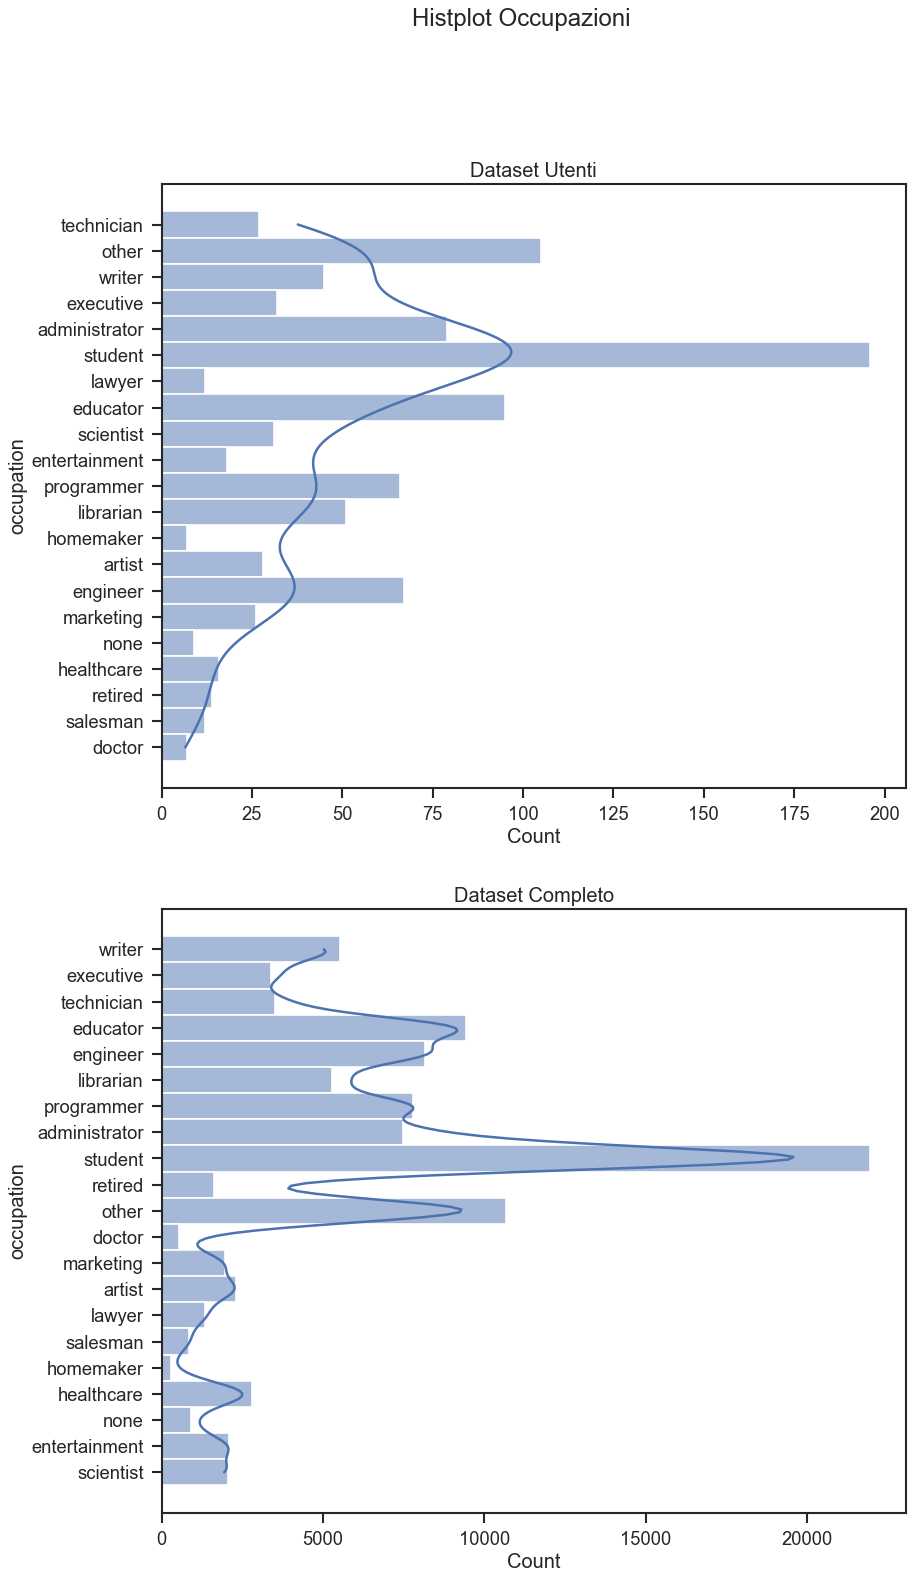

In [50]:
plt.rcParams['figure.figsize'] = [12, 22]
j = 211
for el in ["user", "Complete"]:
    plt.subplot(j)
    sns.histplot(data = data[el] , y = data[el]["occupation"], stat = "count", kde = True, binwidth = 1)
    #data[el].plot.hist( ax = plt.subplot(j))
    plt.title("Dataset " + nomi[el])
    j += 1
plt.suptitle("Histplot Occupazioni")

#Save
saveImg("Hist_Occupation", "", sf)

Notiamo che l'occupazione più presente nella nostra popolazione è quella degli studenti che ha portato anche alla maggior parte delle valutazioni  

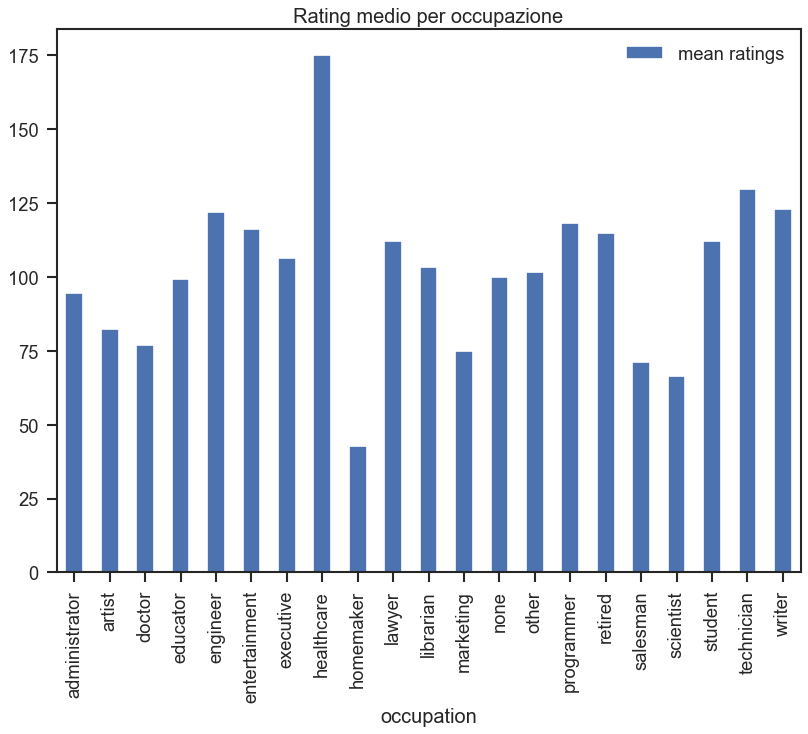

In [51]:
plt.rcParams['figure.figsize'] = [12, 9]
c = data["Complete"].groupby("occupation").count()
u = data["user"].groupby("occupation").count()
media = {}
for i in u.index:
    media[i] = c.loc[i]["gender"] / u.loc[i]["gender"]
media = pd.DataFrame.from_dict(media, orient = "index")
media.index.name = "occupation"
media.rename(columns = { 0 :"mean ratings"}, inplace = True)
media
media.plot.bar()
plt.title("Rating medio per occupazione")

#Save
saveImg("meanRating_Occupation", "", sf)

In [52]:
display(maxSeries(media["mean ratings"]))
display(minSeries(media["mean ratings"]))

('healthcare', 175.25)

('homemaker', 42.714285714285715)

In [53]:
m = maxSeries(media["mean ratings"])
print("L'occupazione " + m[0] + " è quella che ha mediamente votato di più con una media di " + str(round(m[1], 2)))
m = minSeries(media["mean ratings"])
print("L'occupazione " + m[0] + " è quella che ha mediamente votato di meno con una media di " + str(round(m[1], 2)))

L'occupazione healthcare è quella che ha mediamente votato di più con una media di 175.25
L'occupazione homemaker è quella che ha mediamente votato di meno con una media di 42.71


proviamo ad avere una visione generale dell'età media delle occupazioni per sesso

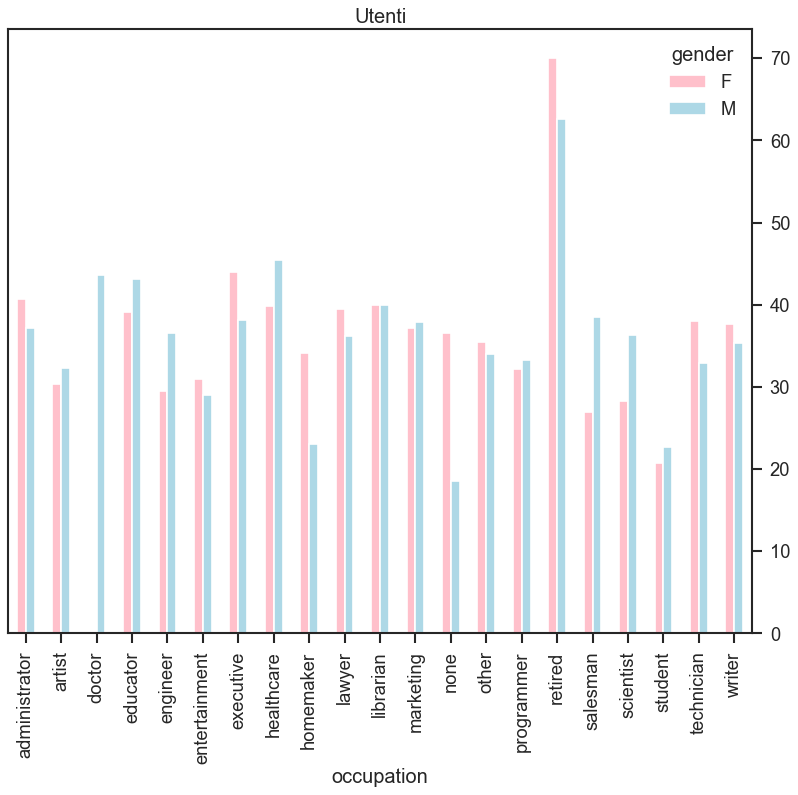

In [54]:
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = True
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = False

x = data["user"].groupby(["occupation", "gender"])["age"].mean().unstack()
x.plot.bar(color = ["pink", "lightblue"])
plt.title("Utenti")

#Save
saveImg("Utenti", "", sf)

plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = False
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = True


### Film

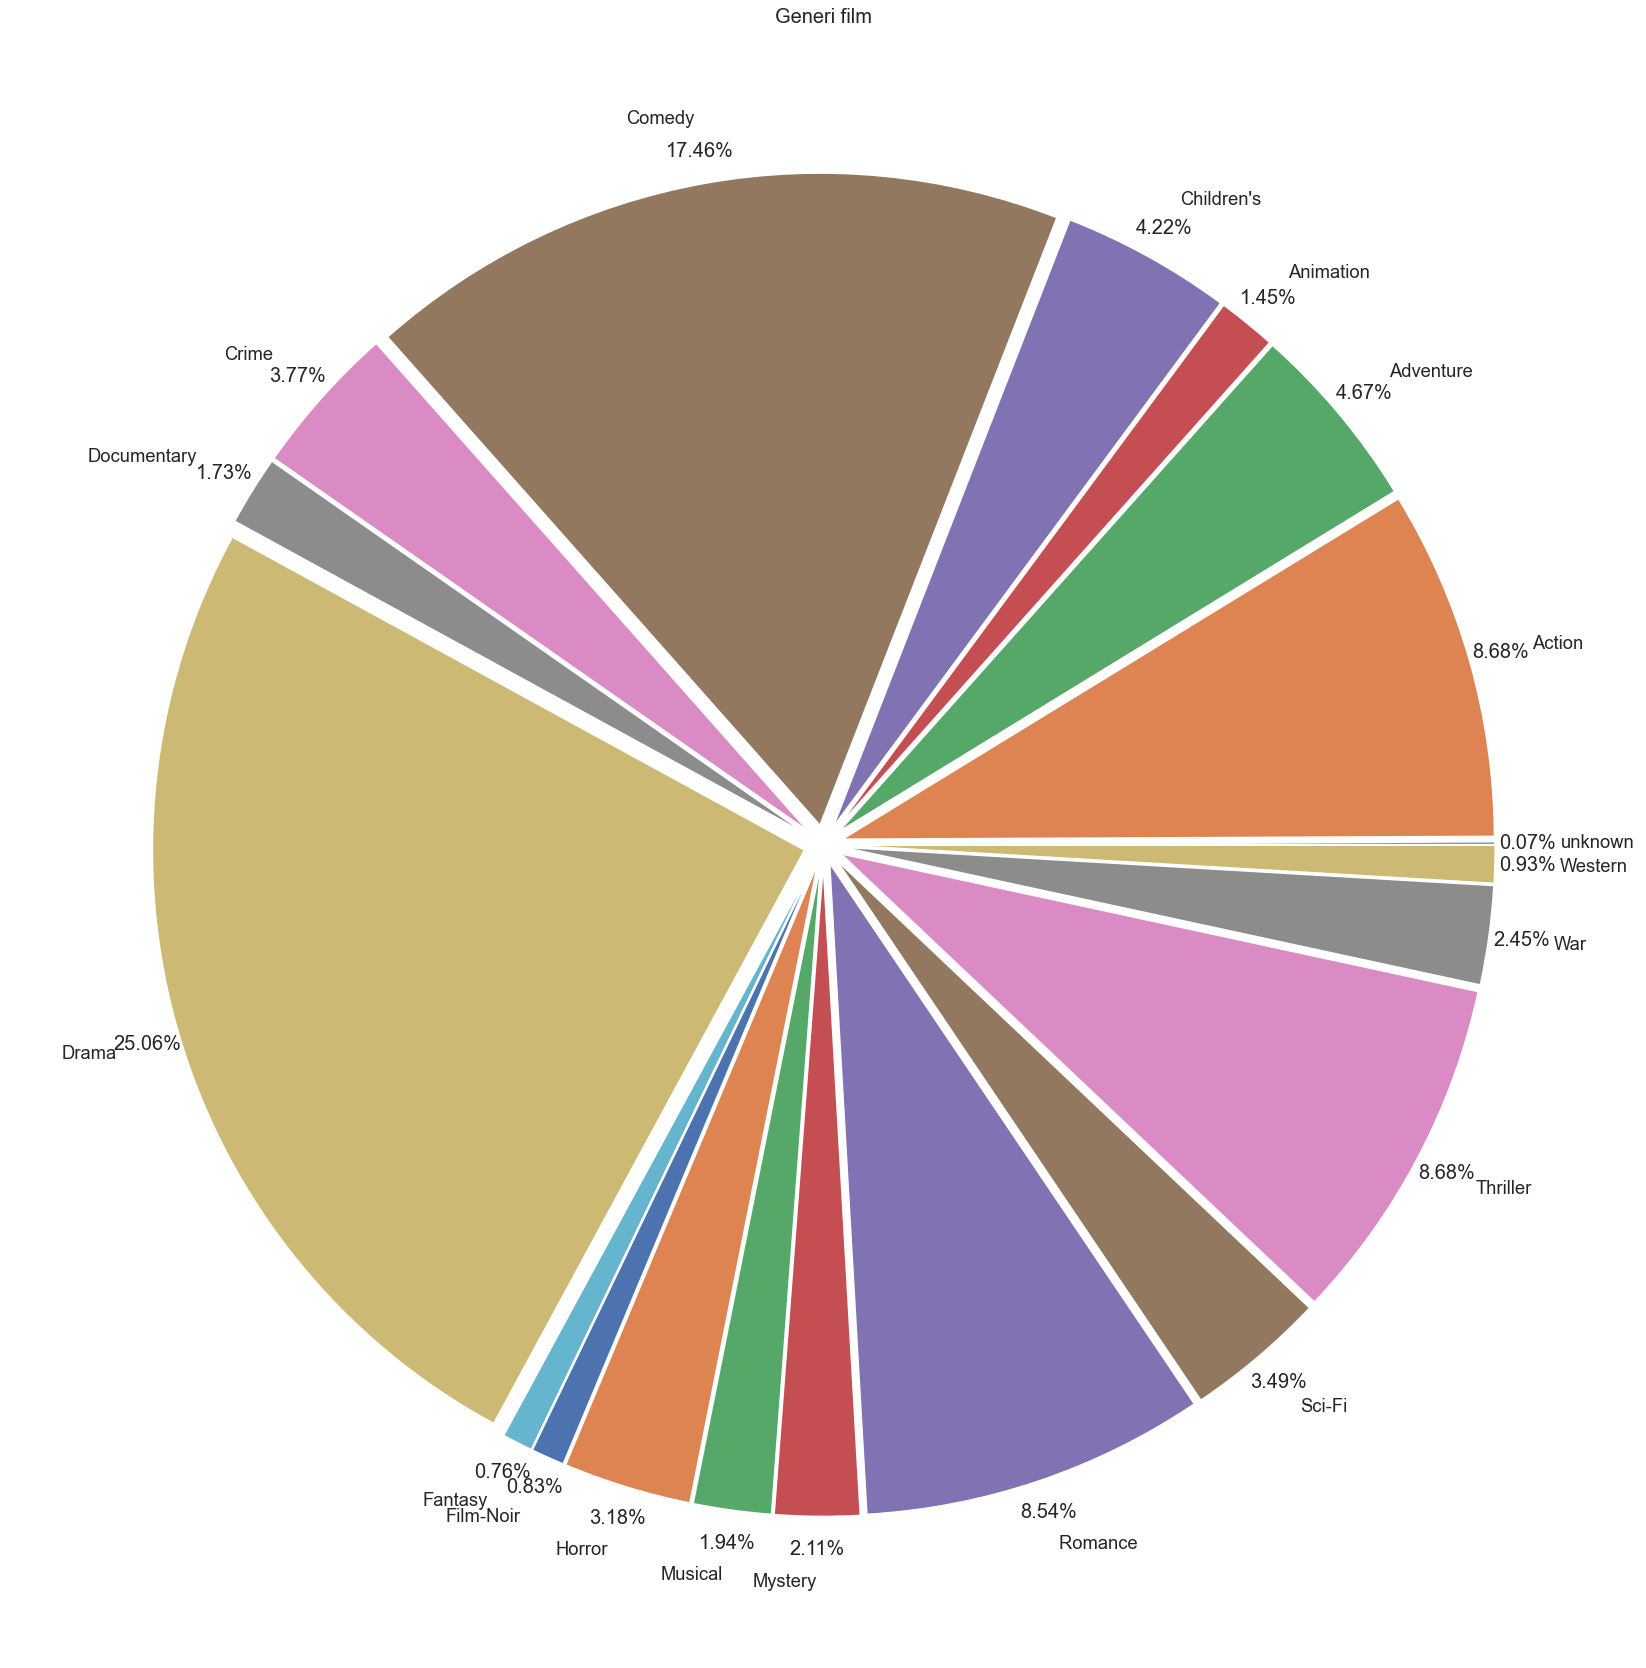

In [55]:
plt.rcParams['figure.figsize'] = [27, 27]
plt.pie(data["item"][colonne["item"][-19:]].sum(), colors = sns.color_palette("deep"), pctdistance=1.05,
    labeldistance=1.1, labels = colonne["item"][-19:], autopct='%.2f%%', explode = tuple([0.03]*19))
plt.title("Generi film")

#Save
saveImg("Film1", "", sf)


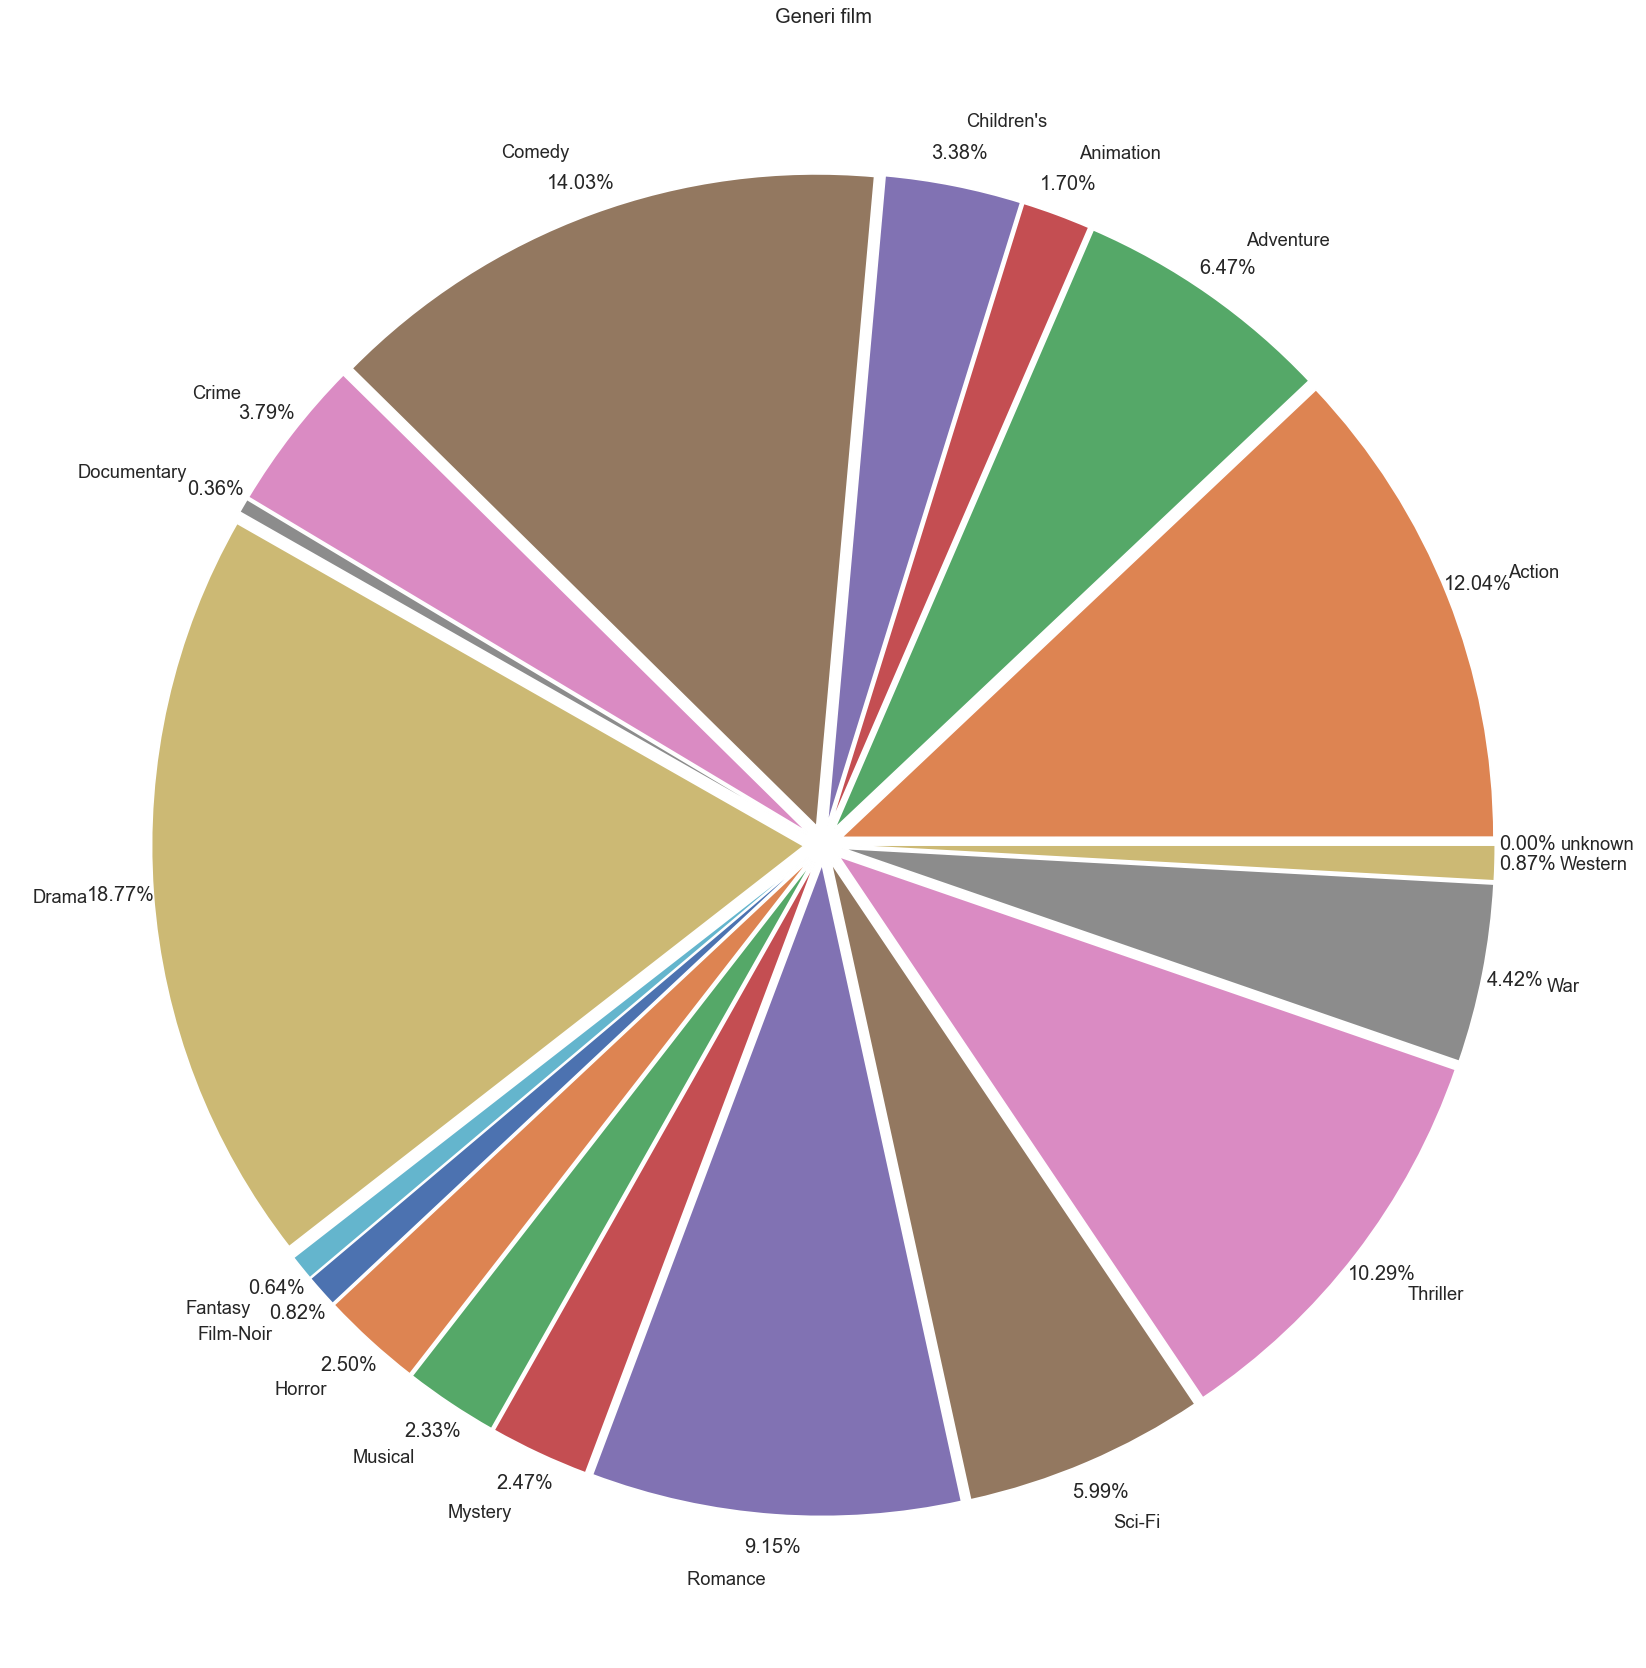

In [56]:
plt.rcParams['figure.figsize'] = [27, 27]
plt.pie(data["Complete"][colonne["item"][-19:]].sum(), colors = sns.color_palette("deep"), pctdistance=1.05,
    labeldistance=1.1, labels = colonne["item"][-19:], autopct='%.2f%%', explode = tuple([0.03]*19))
plt.title("Generi film")

#Save
saveImg("Film2", "", sf)


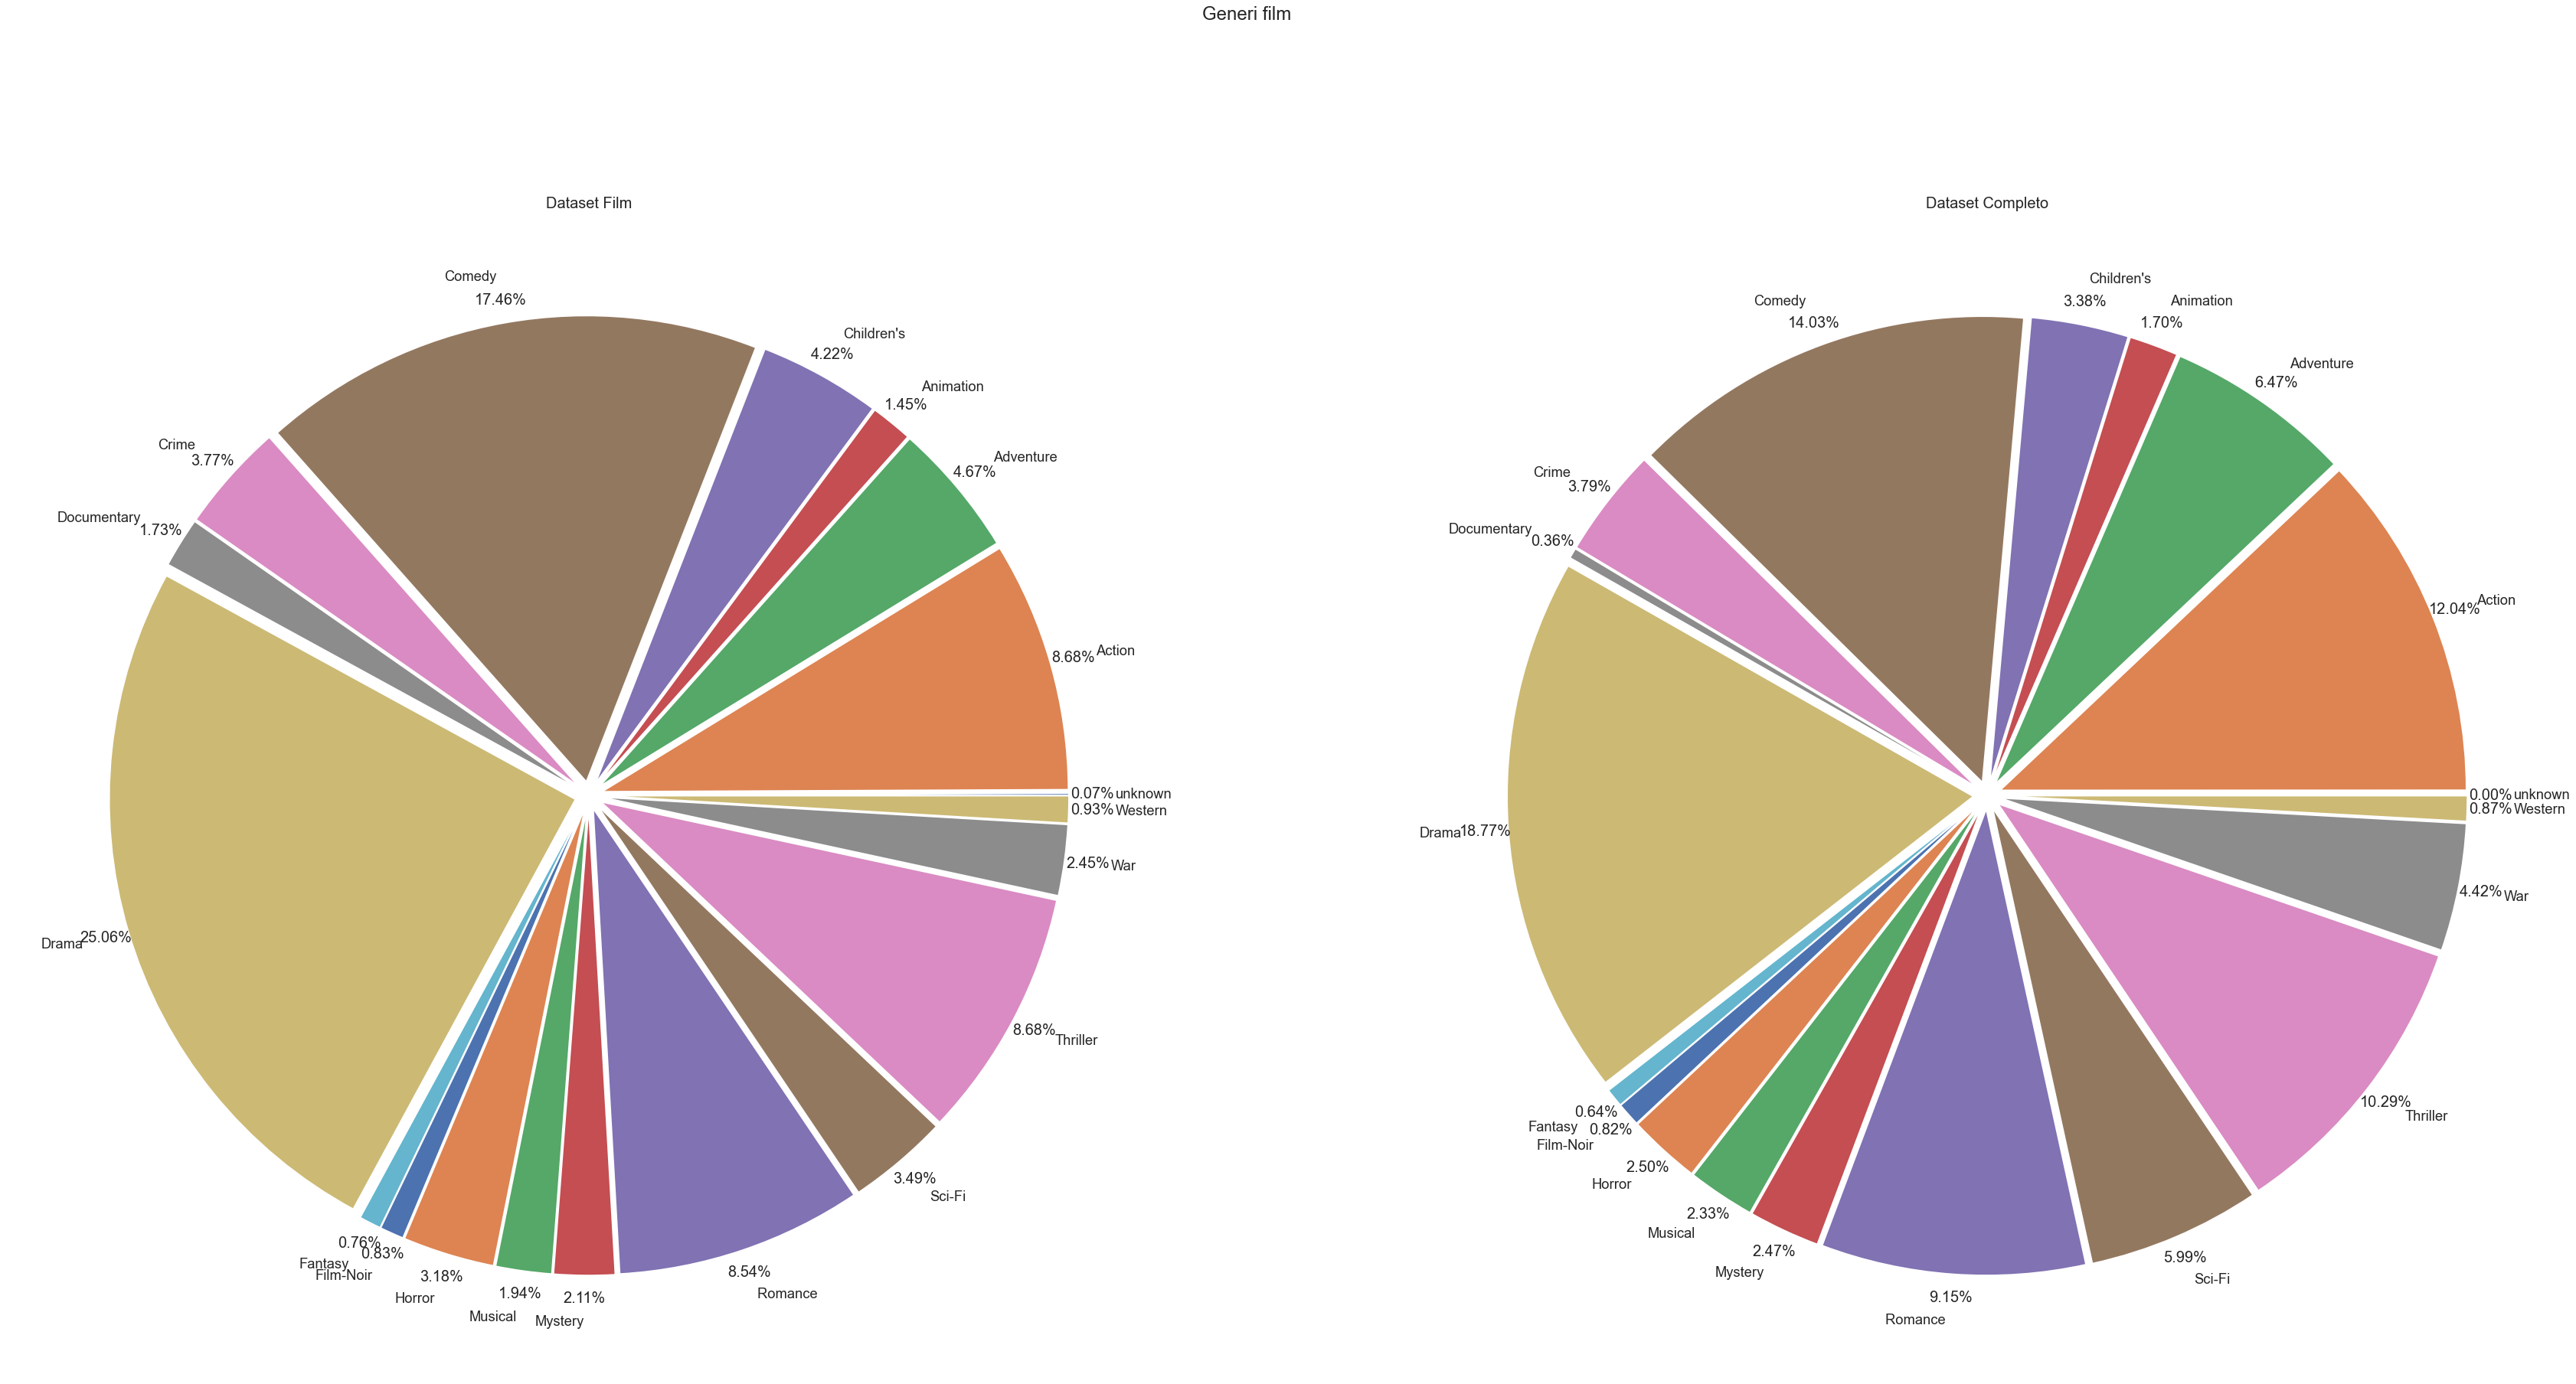

In [57]:
plt.rcParams['figure.figsize'] = [54, 27]
j = 121
for el in ["item", "Complete"]:
    plt.subplot(j)
    plt.pie(data[el][colonne["item"][-19:]].sum(), colors = sns.color_palette("deep"), pctdistance=1.05,
    labeldistance=1.1, labels = colonne["item"][-19:], autopct='%.2f%%', explode = tuple([0.03]*19))
    plt.title("Dataset " + nomi[el])
    j += 1

plt.suptitle("Generi film")

#Save
saveImg("FilmComp", "", sf)

### rating

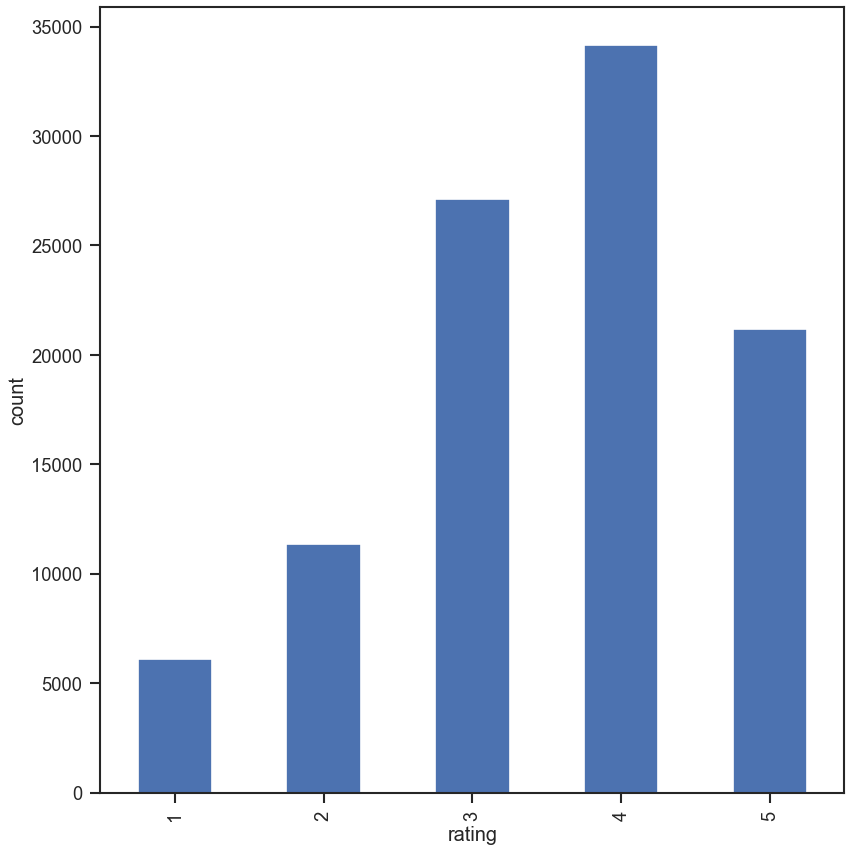

In [58]:
plt.rcParams['figure.figsize'] = [12, 13]
x = data["Complete"].groupby("rating").count()["age"]
x.plot.bar()
plt.ylabel("count")

#Save
saveImg("rating count", "", sf)

In [59]:
print("la votazione media dei film è di "+ str(round(data["Complete"]["rating"].mean(), 2)))

la votazione media dei film è di 3.53


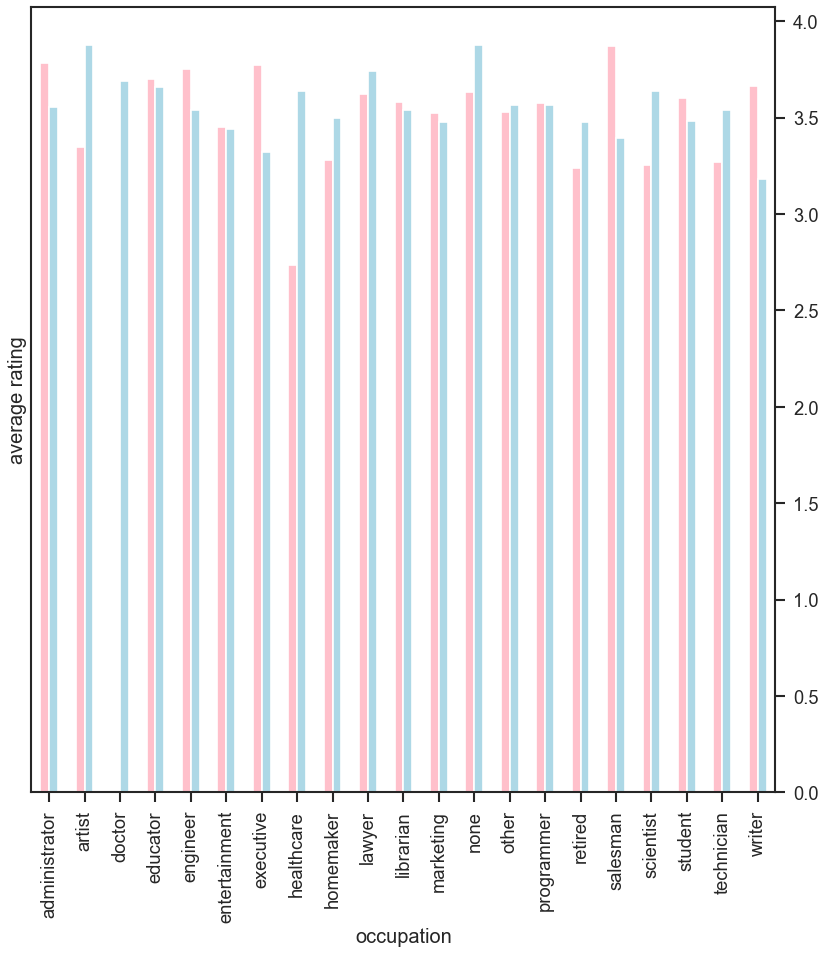

In [60]:
plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = True
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = False
x = data["Complete"].groupby(["occupation", "gender"])["rating"].mean().unstack()
x.plot.bar(color = ["pink", "lightblue"], legend = None)
plt.ylabel("average rating")

#Save
saveImg("meanrating_user", "", sf)

In [61]:
x = data["Complete"].groupby("occupation")["rating"].mean()
x

occupation
administrator    3.635646
artist           3.653380
doctor           3.688889
educator         3.670621
engineer         3.541407
entertainment    3.441050
executive        3.349104
healthcare       2.896220
homemaker        3.301003
lawyer           3.735316
librarian        3.560781
marketing        3.485641
none             3.779134
other            3.552377
programmer       3.568260
retired          3.466750
salesman         3.582944
scientist        3.611273
student          3.515143
technician       3.532230
writer           3.375723
Name: rating, dtype: float64

In [62]:
m = maxSeries(x)
print("L'occupazione " + m[0] + " è quella che ha una votazione media più elevata con una media di " + str(round(m[1], 2)))
m = minSeries(x)
print("L'occupazione " + m[0] + " è quella che ha una votazione media meno elevata con una media di " + str(round(m[1], 2)))

L'occupazione none è quella che ha una votazione media più elevata con una media di 3.78
L'occupazione healthcare è quella che ha una votazione media meno elevata con una media di 2.9


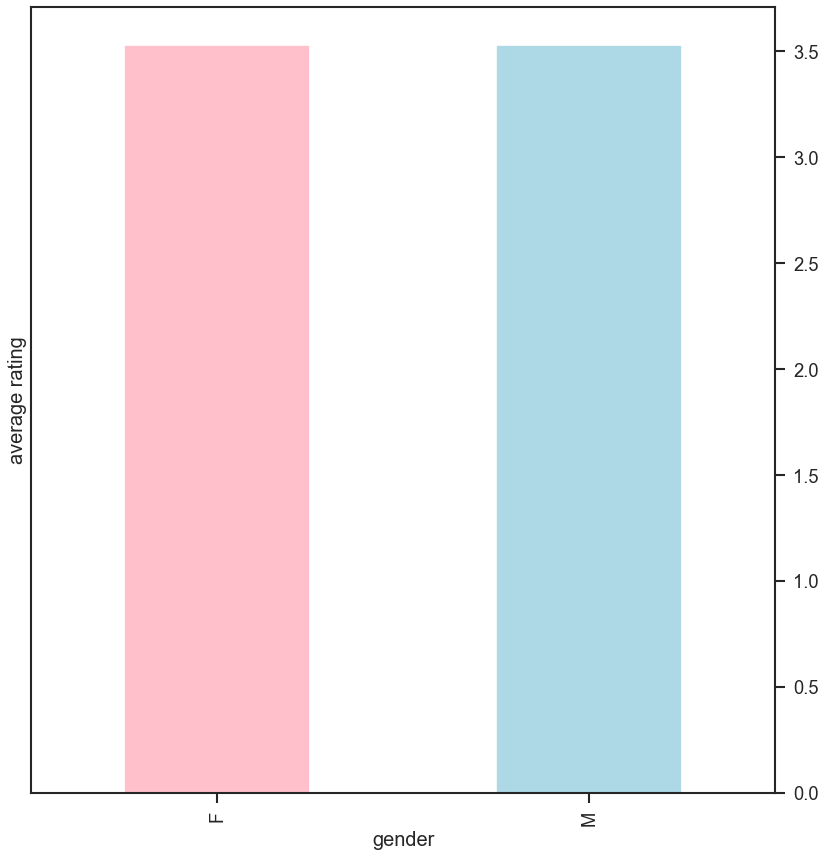

In [63]:
x = data["Complete"].groupby("gender").mean()["rating"]
x.plot.bar(color = ["pink", "lightblue"])
plt.ylabel("average rating")

#Save
saveImg("meanrating_gender", "", sf)

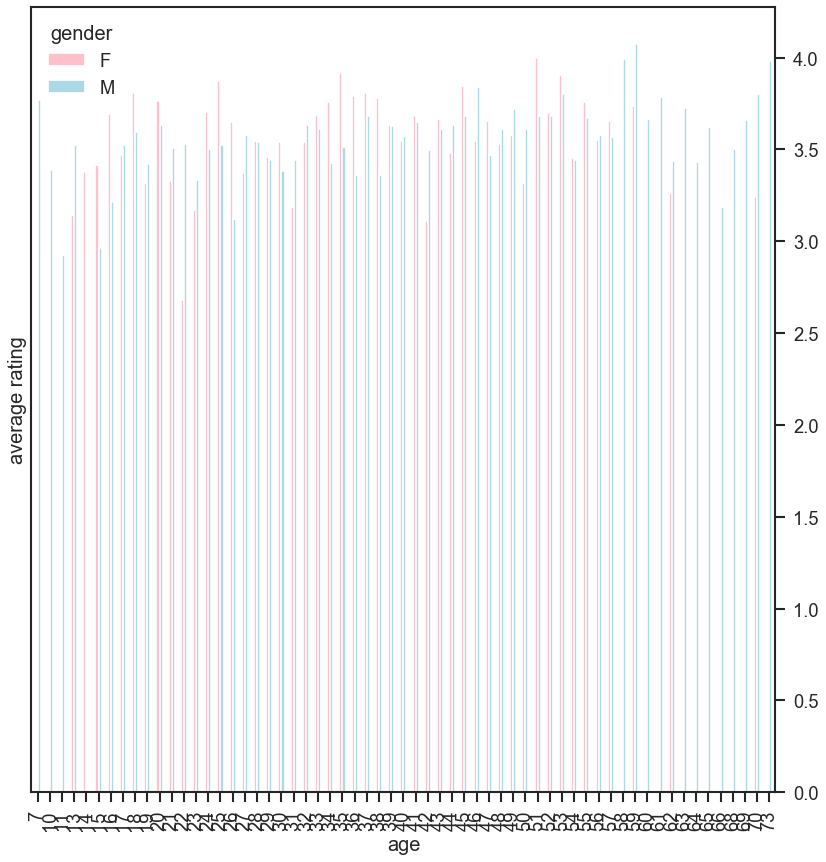

In [64]:
x = data["Complete"].groupby(["age", "gender"])["rating"].mean().unstack()
x.plot.bar(color = ["pink", "lightblue"])
plt.ylabel("average rating")

#Save
saveImg("meanrating_ageGender", "", sf)

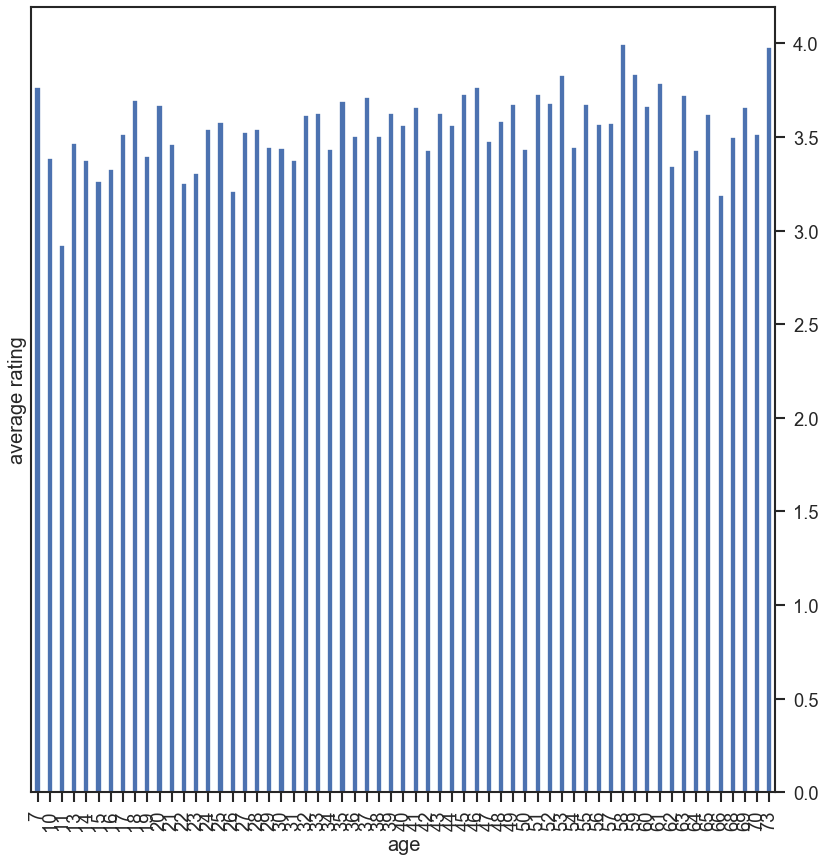

In [65]:
x = data["Complete"].groupby("age").mean()["rating"]
x.plot.bar()
plt.ylabel("average rating")

#Save
saveImg("meanrating_age", "", sf)

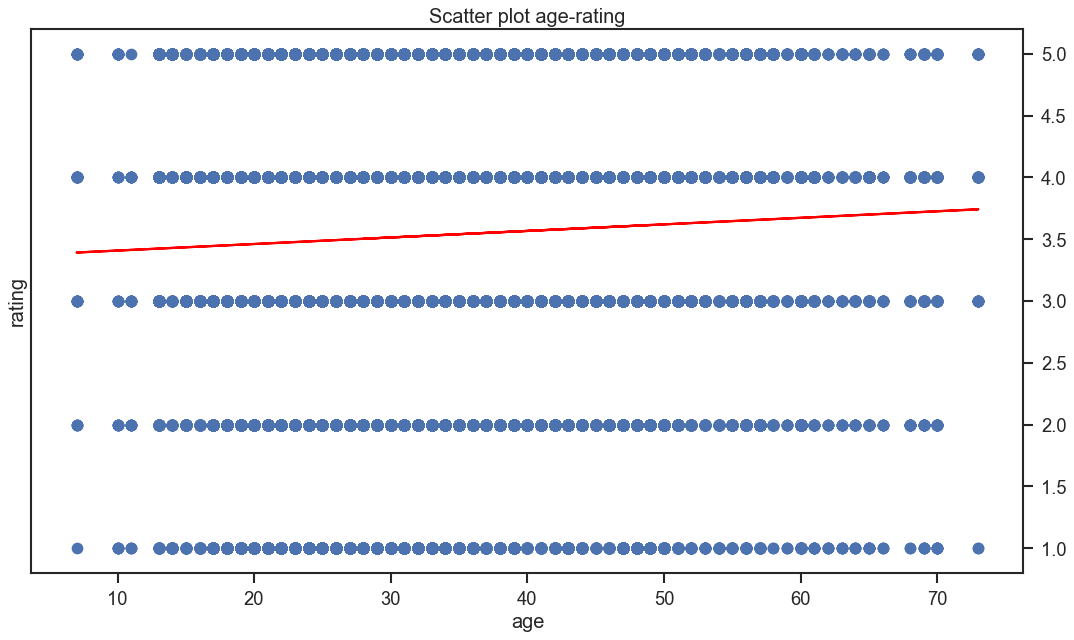

In [66]:
plt.rcParams['figure.figsize'] = [16, 9]
reg = np.polyfit(data["Complete"]["age"], data["Complete"]["rating"], deg=1)
plt.scatter(data["Complete"]["age"], data["Complete"]["rating"], marker = 'o')
plt.plot(data["Complete"]["age"], np.polyval(reg, data["Complete"]["age"]), 'r', lw=2)
plt.title("Scatter plot age-rating")
plt.xlabel("age")
plt.ylabel("rating")

#Save
saveImg("Scatter_ratingage", "", sf)

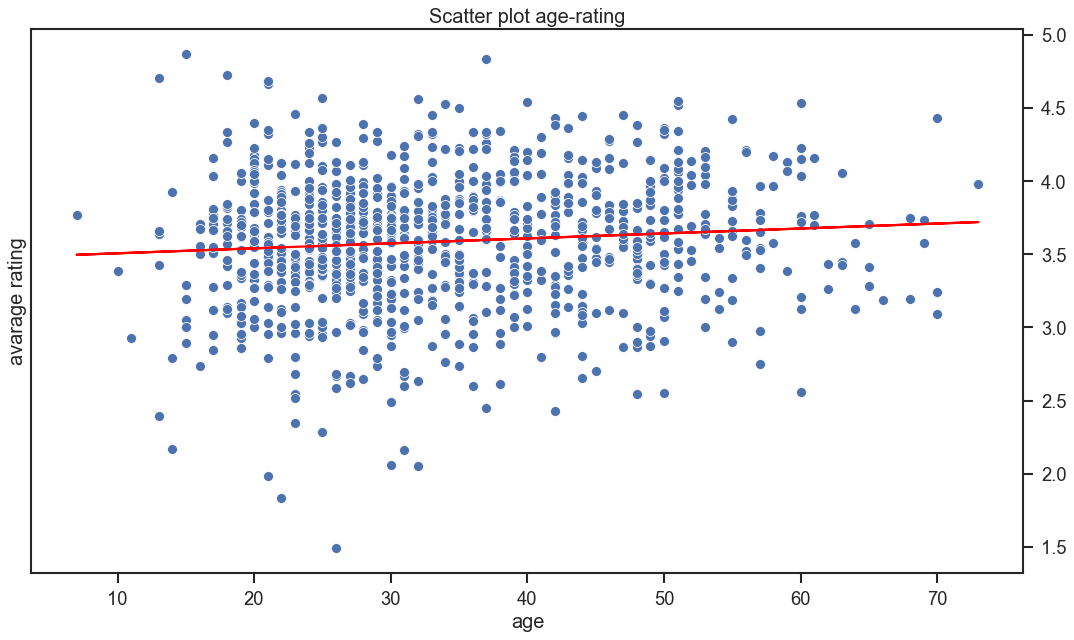

In [67]:
scatter = data["Complete"].groupby("user id").mean()[["rating", "age"]]
reg = np.polyfit(scatter["age"], scatter["rating"], deg=1)
sns.scatterplot(scatter["age"], scatter["rating"], marker = 'o')
plt.plot(scatter["age"], np.polyval(reg, scatter["age"]), 'r', lw=2)
plt.title("Scatter plot age-rating")
plt.xlabel("age")
plt.ylabel("avarage rating")

#Save
saveImg("Scatter_ratingage_Mean", "", sf)

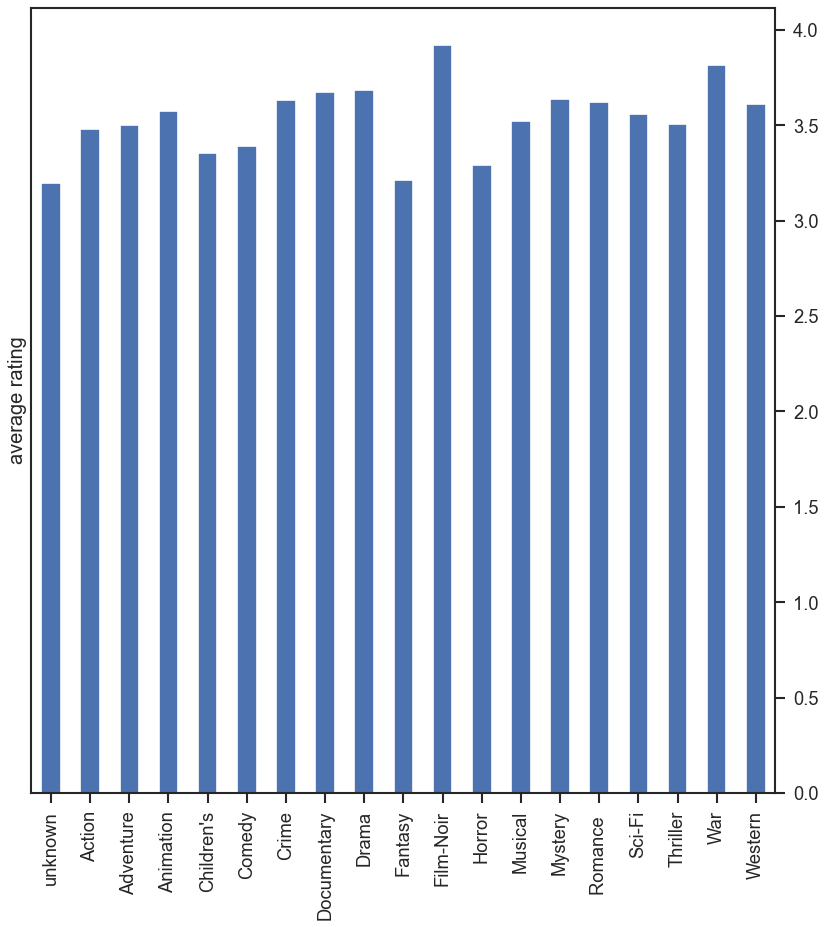

In [68]:
plt.rcParams['figure.figsize'] = [12, 13]
x = pd.DataFrame(index = colonne["item"][-19:], columns = ["mean"])
for el in x.index:
    x["mean"][el] = data["Complete"].groupby(el)["rating"].mean()[1]
x.plot.bar(legend = None)
plt.ylabel("average rating")

#Save
saveImg("meanrating_Genre", "", sf)

plt.rcParams['ytick.right'] = plt.rcParams['ytick.labelright'] = False
plt.rcParams['ytick.left'] = plt.rcParams['ytick.labelleft'] = True

In [69]:
m = maxSeries(x["mean"])
print("Il genere " + m[0] + " è quello che ha mediamente una votazione più elevata con una media di " + str(round(m[1], 2)))
m = minSeries(x["mean"])
print("Il genere " + m[0] + " è quello che ha mediamente una votazione meno elevata con una media di " + str(round(m[1], 2)))

Il genere Film-Noir è quello che ha mediamente una votazione più elevata con una media di 3.92
Il genere unknown è quello che ha mediamente una votazione meno elevata con una media di 3.2


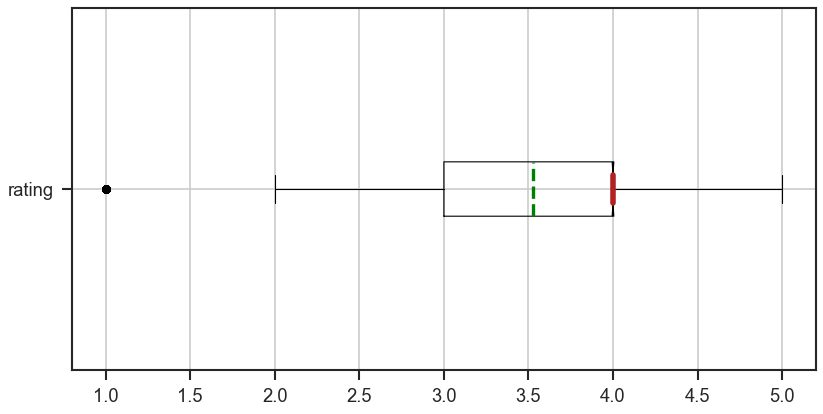

In [70]:
plt.rcParams['figure.figsize'] = [12, 6]

plt.boxplot(data["Complete"]["rating"], vert = False, sym = "k",
    medianprops = dict(linestyle = '-', linewidth = 5, color = 'Firebrick'),
    meanprops = dict(linestyle = '--', linewidth = 3, color = 'green'),
    showmeans = True, meanline = True, labels = ["rating"], notch = True)
plt.grid(True)

#Save
saveImg("Box_rating", "", sf)


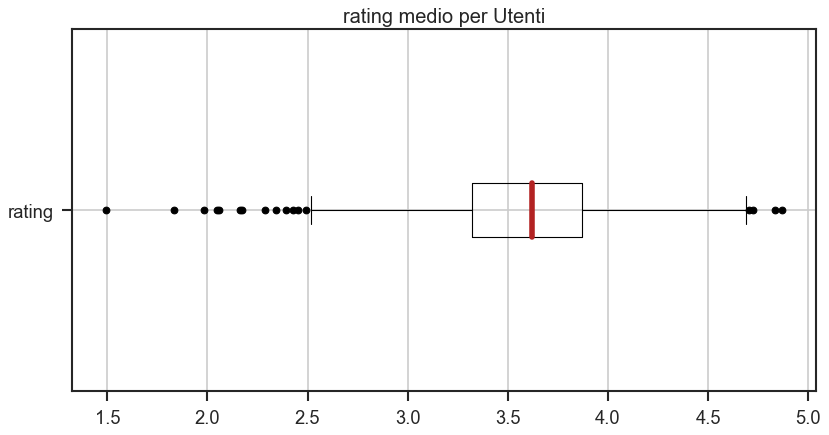

In [71]:
plt.boxplot(data["Complete"].groupby("user id")["rating"].mean(), vert = False, sym = "k",
    medianprops = dict(linestyle = '-', linewidth = 5, color = 'Firebrick'),
    meanline = True, labels = ["rating"])
plt.grid(True)
plt.title("rating medio per Utenti")

#Save
saveImg("Box_ratingmean_User", "", sf)

In [72]:
data["Complete"].groupby("user id")["rating"].mean().describe()

count    943.000000
mean       3.588191
std        0.445233
min        1.491954
25%        3.323054
50%        3.620690
75%        3.869565
max        4.869565
Name: rating, dtype: float64

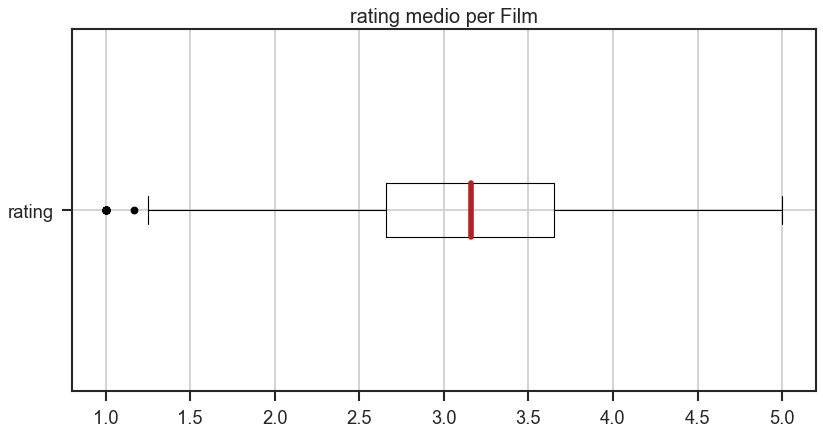

In [73]:
plt.boxplot(data["Complete"].groupby("item id")["rating"].mean(), vert = False, sym = "k",
    medianprops = dict(linestyle = '-', linewidth = 5, color = 'Firebrick'),
    meanline = True, labels = ["rating"])
plt.grid(True)
plt.title("rating medio per Film")

#Save
saveImg("Box_ratingmean_Item", "", sf)

In [74]:
data["Complete"].groupby("item id")["rating"].mean().describe()

count    1682.000000
mean        3.076045
std         0.781662
min         1.000000
25%         2.659600
50%         3.161528
75%         3.653428
max         5.000000
Name: rating, dtype: float64

### Correlazioni

In [75]:
data["Complete"][colonne["item"][-19:]].corr()

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
unknown,1.000000,-0.005864,-0.003993,-0.001934,-0.002782,-0.006521,-0.002960,-0.000874,-0.008148,-0.001171,-0.001328,-0.002370,-0.002283,-0.002353,-0.004916,-0.003819,-0.005291,-0.003221,-0.001374
Action,-0.005864,1.000000,0.451525,-0.099022,-0.144838,-0.223283,0.007478,-0.051250,-0.269833,-0.013883,-0.077876,-0.007718,-0.091214,-0.032807,-0.018748,0.323875,0.249647,0.166665,0.063467
Adventure,-0.003993,0.451525,1.000000,-0.024734,0.100567,-0.113014,-0.030066,-0.034899,-0.223704,0.087760,-0.053030,-0.058654,-0.024798,-0.043676,-0.018516,0.294811,-0.049453,0.087115,0.010551
Animation,-0.001934,-0.099022,-0.024734,1.000000,0.555386,0.029612,-0.057239,-0.016901,-0.157554,0.026133,-0.025682,-0.028374,0.417647,-0.045498,-0.085441,-0.044729,-0.077146,-0.056401,-0.026579
Children's,-0.002782,-0.144838,0.100567,0.555386,1.000000,0.082916,-0.082333,-0.024310,-0.129973,0.238081,-0.036940,-0.065918,0.381293,-0.055021,-0.119323,-0.042213,-0.144181,-0.085342,-0.031054
Comedy,-0.006521,-0.223283,-0.113014,0.029612,0.082916,1.000000,-0.090993,-0.056733,-0.347459,0.017160,-0.086590,-0.074051,0.035065,-0.111346,0.095863,-0.145618,-0.290535,-0.119817,0.002417
Crime,-0.002960,0.007478,-0.030066,-0.057239,-0.082333,-0.090993,1.000000,-0.025868,0.064043,0.006394,0.163712,-0.015441,-0.067574,0.087773,-0.102522,-0.086917,0.124021,-0.095327,-0.040681
Documentary,-0.000874,-0.051250,-0.034899,-0.016901,-0.024310,-0.056733,-0.025868,1.000000,-0.057781,-0.010231,-0.011606,-0.020710,-0.019953,-0.020562,-0.042960,-0.033379,-0.046241,-0.007206,-0.012012
Drama,-0.008148,-0.269833,-0.223704,-0.157554,-0.129973,-0.347459,0.064043,-0.057781,1.000000,-0.020756,-0.082842,-0.159479,-0.096595,-0.068656,0.013052,-0.174348,-0.163362,0.098864,-0.033253
Fantasy,-0.001171,-0.013883,0.087760,0.026133,0.238081,0.017160,0.006394,-0.010231,-0.020756,1.000000,-0.015547,-0.027742,-0.026727,-0.027543,-0.017085,0.125709,-0.047279,-0.037704,-0.016090


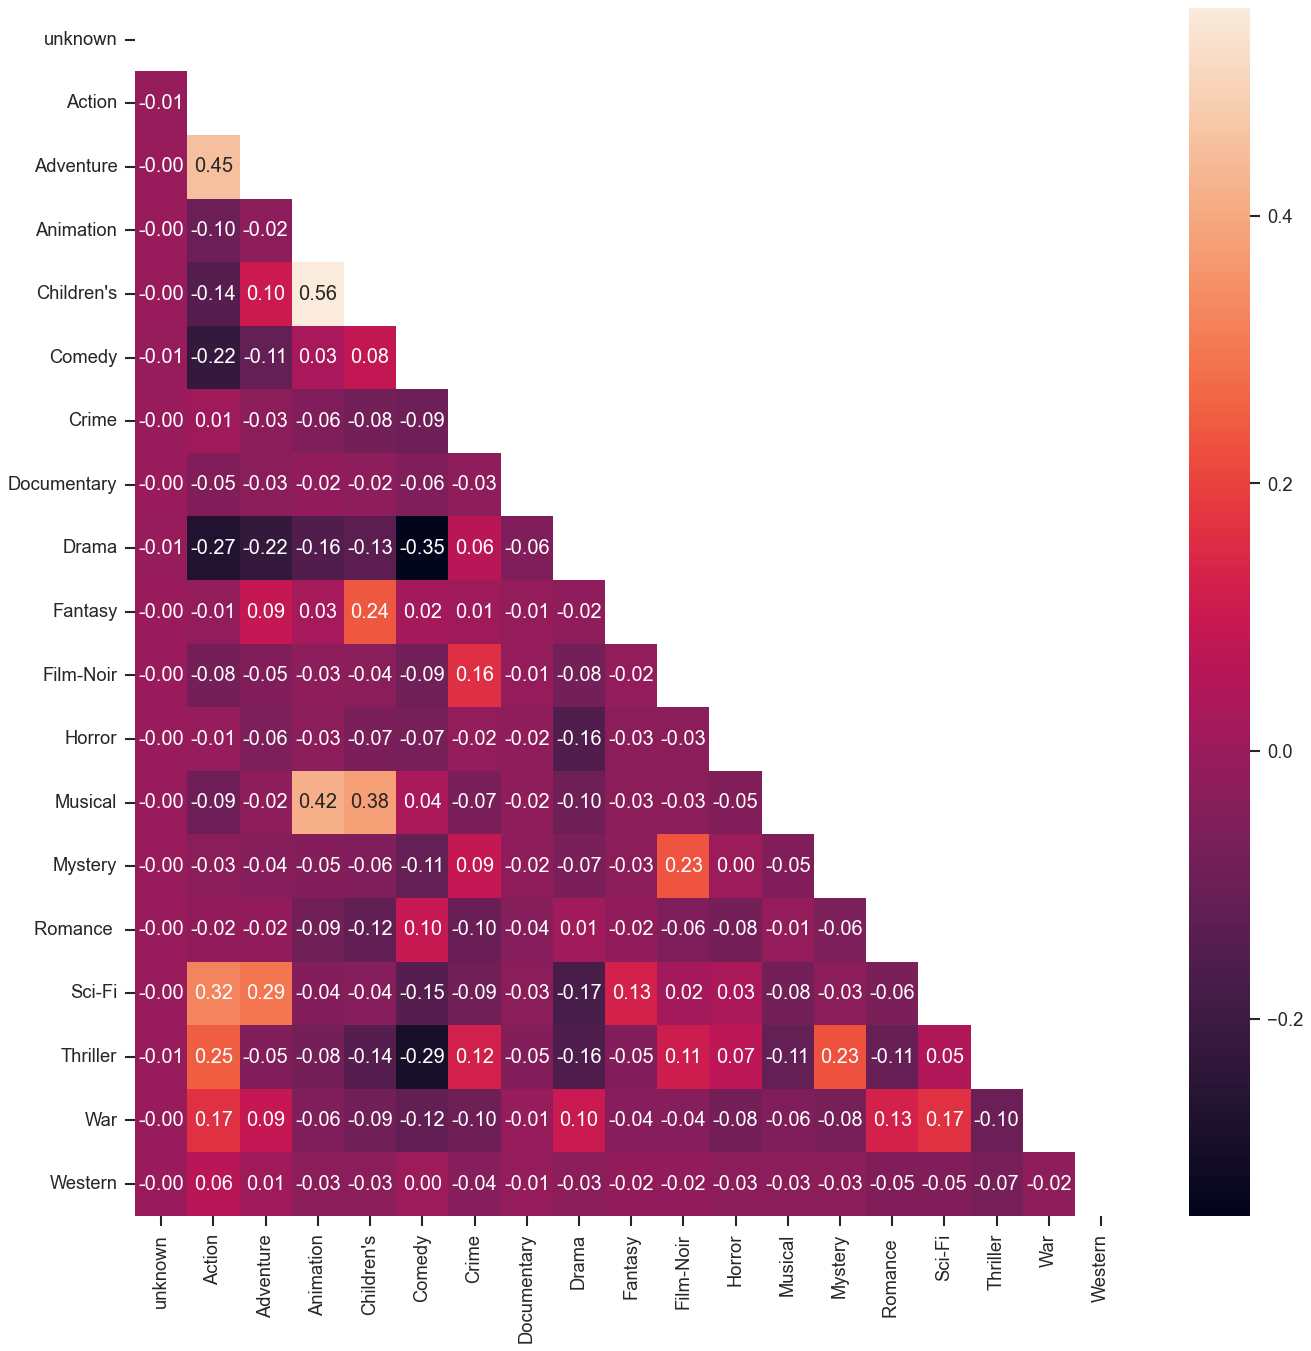

In [76]:
plt.rcParams['figure.figsize'] = [20, 20]
corr = data["Complete"][colonne["item"][-19:]].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot = True, mask = mask, fmt='.2f')

#Save
saveImg("Heat_Occupation", "", sf)

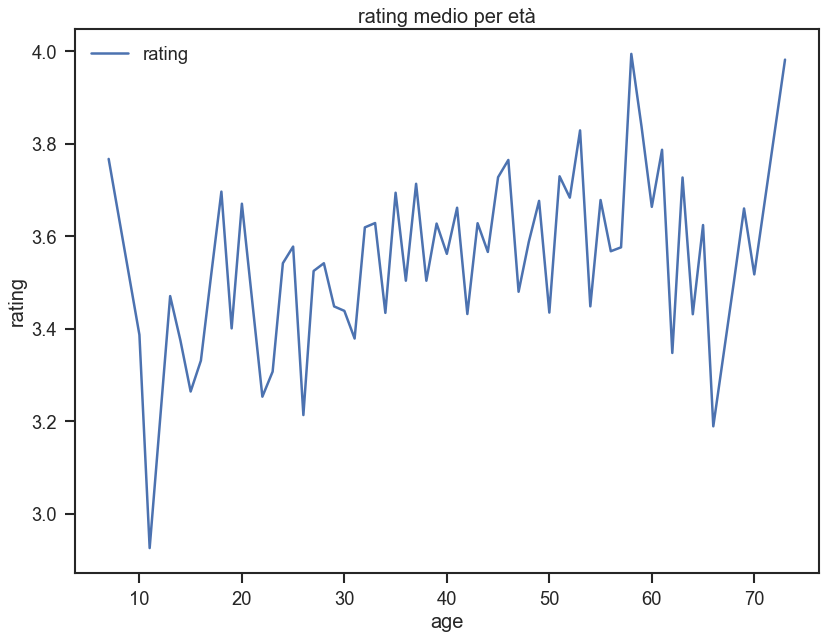

In [77]:
plt.rcParams['figure.figsize'] = [12, 9]
x = pd.DataFrame(data["Complete"].groupby("age").mean().unstack()["rating"], columns = ["rating"])
x.plot()
plt.ylabel("rating")
plt.title("rating medio per età")
#Save
saveImg("age_rating", "", sf)

In [78]:
x.reset_index(level=0, inplace=True)
x.corr()["rating"]["age"]

0.42305156762067114

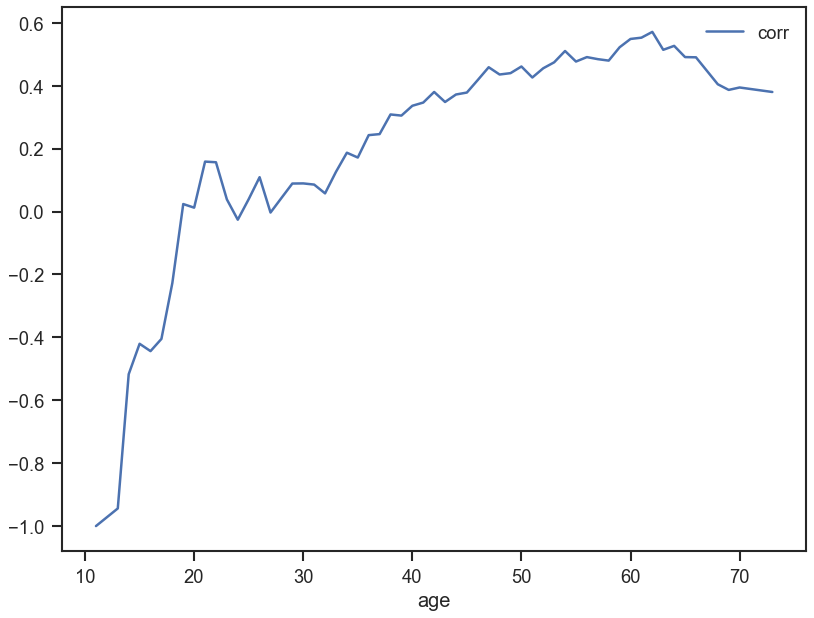

In [79]:
cors = []# andamento della correlazione rispetto all'età
for i in range (0, len(x.index)):
    cors.append(x[:i].corr()["rating"]["age"])
cors = pd.DataFrame(cors, index = x.age, columns = ["corr"])

cors.plot()

#Save
saveImg("age_rating_Corr", "", sf)

# Matrice di Rating

In [80]:
matrix = pd.DataFrame(index = data["user"].index, columns = data["item"].index)

#riempimento delle matrici
for el in data["data"].index:
    matrix.loc[el[0]][el[1]] = data["data"].loc[el[0], el[1]]["rating"]
display(matrix)


movie id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user id,,,,,,,,,,,,,,,,,,,,,
1,5,3,4,3,3,5,4,1,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2,NaN,NaN,4,5,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Rating mancanti 

In [81]:
ratings = len(data["data"].index)# rating presenti
s = len(data["user"].index) * len(data["item"].index)# rating totali

print("La nostra matrice presenta: " + str(s))
print("I rating a nostra disposizione sono: " + str(ratings))
print("I rating mancanti nella nostra matrice sono: " + str(s - ratings))
print("I rating presenti sono il: " + str(round(ratings/s*100, 2)) + "% della nostra matrice")
print("I rating mancanti sono il: " + str(round((s-ratings)/s*100, 2)) + "% della nostra matrice")

La nostra matrice presenta: 1586126
I rating a nostra disposizione sono: 100000
I rating mancanti nella nostra matrice sono: 1486126
I rating presenti sono il: 6.3% della nostra matrice
I rating mancanti sono il: 93.7% della nostra matrice


Notiamo quindi che la nostra matrice è molto sparsa 

# KNN

### `sign_pred`

Funzione che dato un valore float che cerca di dare maggiore significatività allla previsione se a metà tra i due rating o se più vicino ad uno dei due interi possibili

In [82]:
def sign_pred (pred):
    if pred < 1:
        return 1
    else:
        fl = math.floor(pred)
        if (pred < fl + .4) or (pred > fl + .6):
            return round(pred)
        else:
            return fl + .5

## Preparazione delle variabili

In [83]:
reader = Reader('ml-100k')
datas = Dataset.load_builtin('ml-100k')
trainset = datas.build_full_trainset()

## Ottimizzazione dell'iperparametro k

Salco i valori di RMSE e MOA per ogni k da 2 a 100 sia per entrambe le similarità 

In [84]:
fitK = {}
for sim in ["cosine", "pearson"]:
    print("Similarity: " + sim)
    fitK[sim] = pd.DataFrame(index = range(2, 101), columns = ["RMSE", "MAE", "MSE"])
    for k in fitK[sim].index:
        algo = KNNBasic(k = k, sim_options = {'name': sim}, verbose = False)
        algo.fit(trainset)
        cross = cross_validate(algo, datas, measures = ['RMSE', 'MAE', "MSE"], cv = 5, verbose = False)
        
        # Salvataggio valori di accuracy
        fitK[sim]["RMSE"][k] = cross["test_rmse"].mean()
        fitK[sim]["MSE"][k] = cross["test_mse"].mean()
        fitK[sim]["MAE"][k] = cross["test_mae"].mean()
        
        # Percentuale di procedimento
        print(str(k - 1) + "%", end = "\t")
    
    print("100%")
    print("Similarity: " + sim)
    display(fitK[sim])

Similarity: cosine
1%	2%	3%	4%	5%	6%	7%	8%	9%	10%	11%	12%	13%	14%	15%	16%	17%	18%	19%	

KeyboardInterrupt: 

### Stampa di valori migliori

In [ ]:
for sim in fitK:
    print("-" * 30 + " " + sim + " " + "-" * 30)
    for acc in fitK[sim].columns:
        mn = minSeries(fitK[sim][acc])
        print("Best K for " + acc + ": " + str(mn[0]) + "\t" + acc + ": " + str(mn[1]))

------------------------------ cosine ------------------------------
Best K for RMSE: 50	RMSE: 1.01525736743558
Best K for MAE: 43	MAE: 0.8034726150853067
Best K for MSE: 50	MSE: 1.0308056493695343
------------------------------ pearson ------------------------------
Best K for RMSE: 70	RMSE: 1.009543336586824
Best K for MAE: 72	MAE: 0.8016498563549916
Best K for MSE: 70	MSE: 1.01920526950534


### Grafici

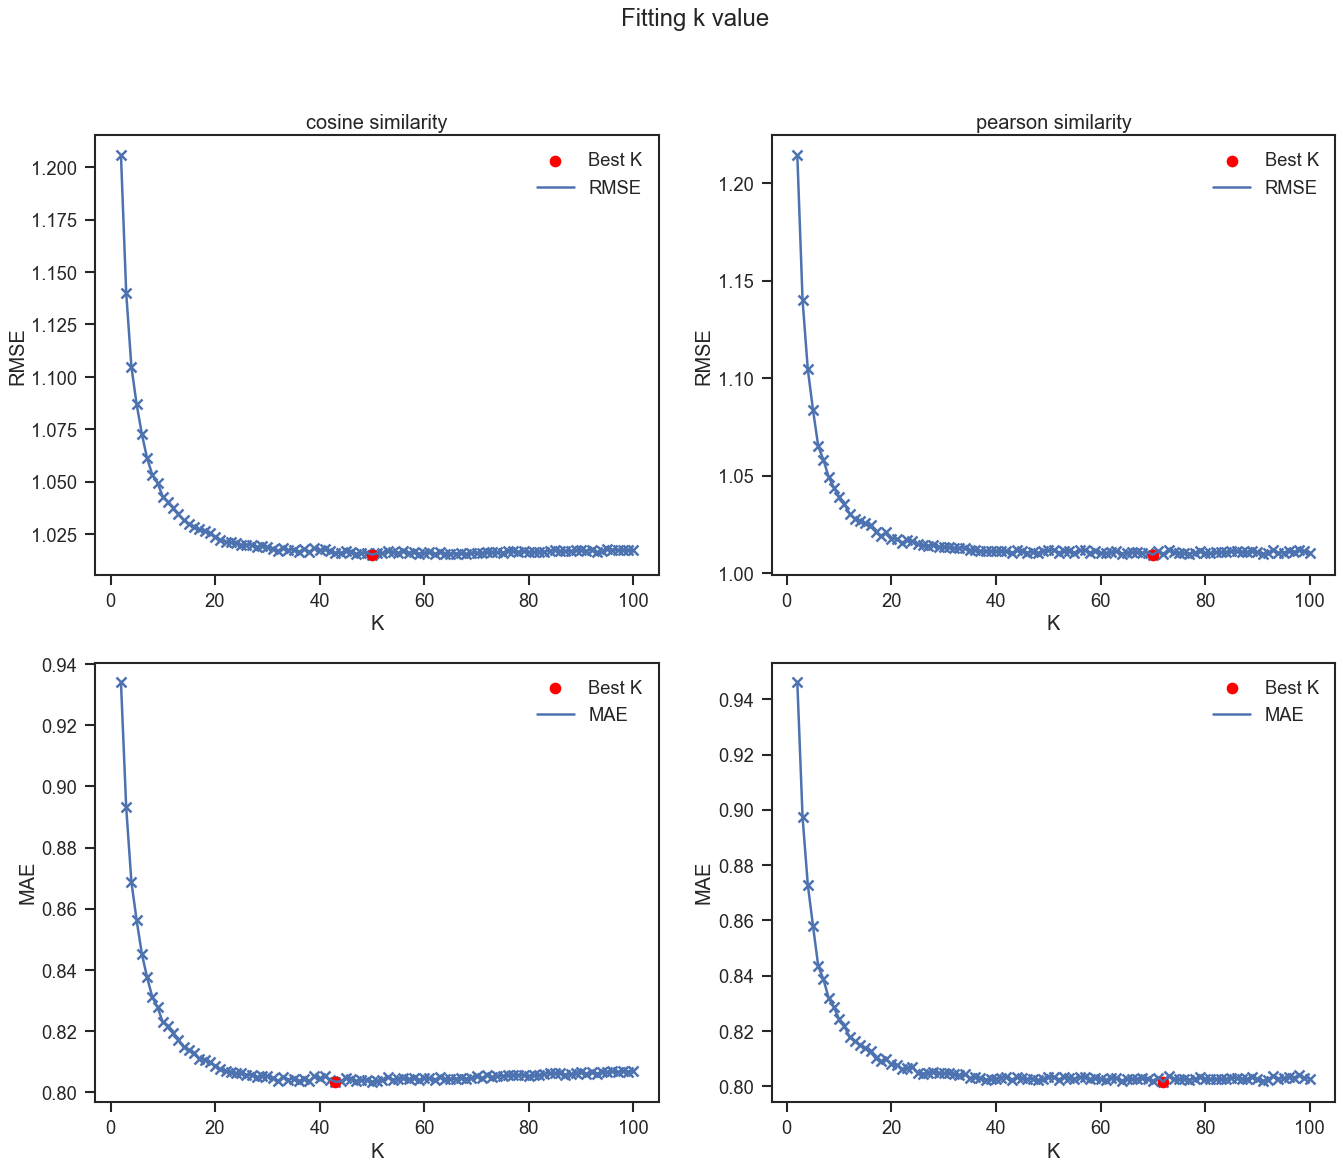

In [ ]:
plt.rcParams['figure.figsize'] = [20, 16]
i = 221
for sim in fitK:
    for acc in ["RMSE", "MAE"]:
        plt.subplot(i)
        if i < 223:
            plt.title(sim + " similarity")
        plt.scatter(fitK[sim].index, fitK[sim][acc], marker = "x")
        mn = minSeries(fitK[sim][acc])
        plt.scatter(mn[0], mn[1], marker = "o", color = "red", label = "Best K")
        fitK[sim][acc].plot()
        plt.ylabel(acc)
        plt.xlabel("K")
        plt.legend()
        i += 2
    i = 222
plt.suptitle("Fitting k value")
saveImg("fitAll", "", sf)

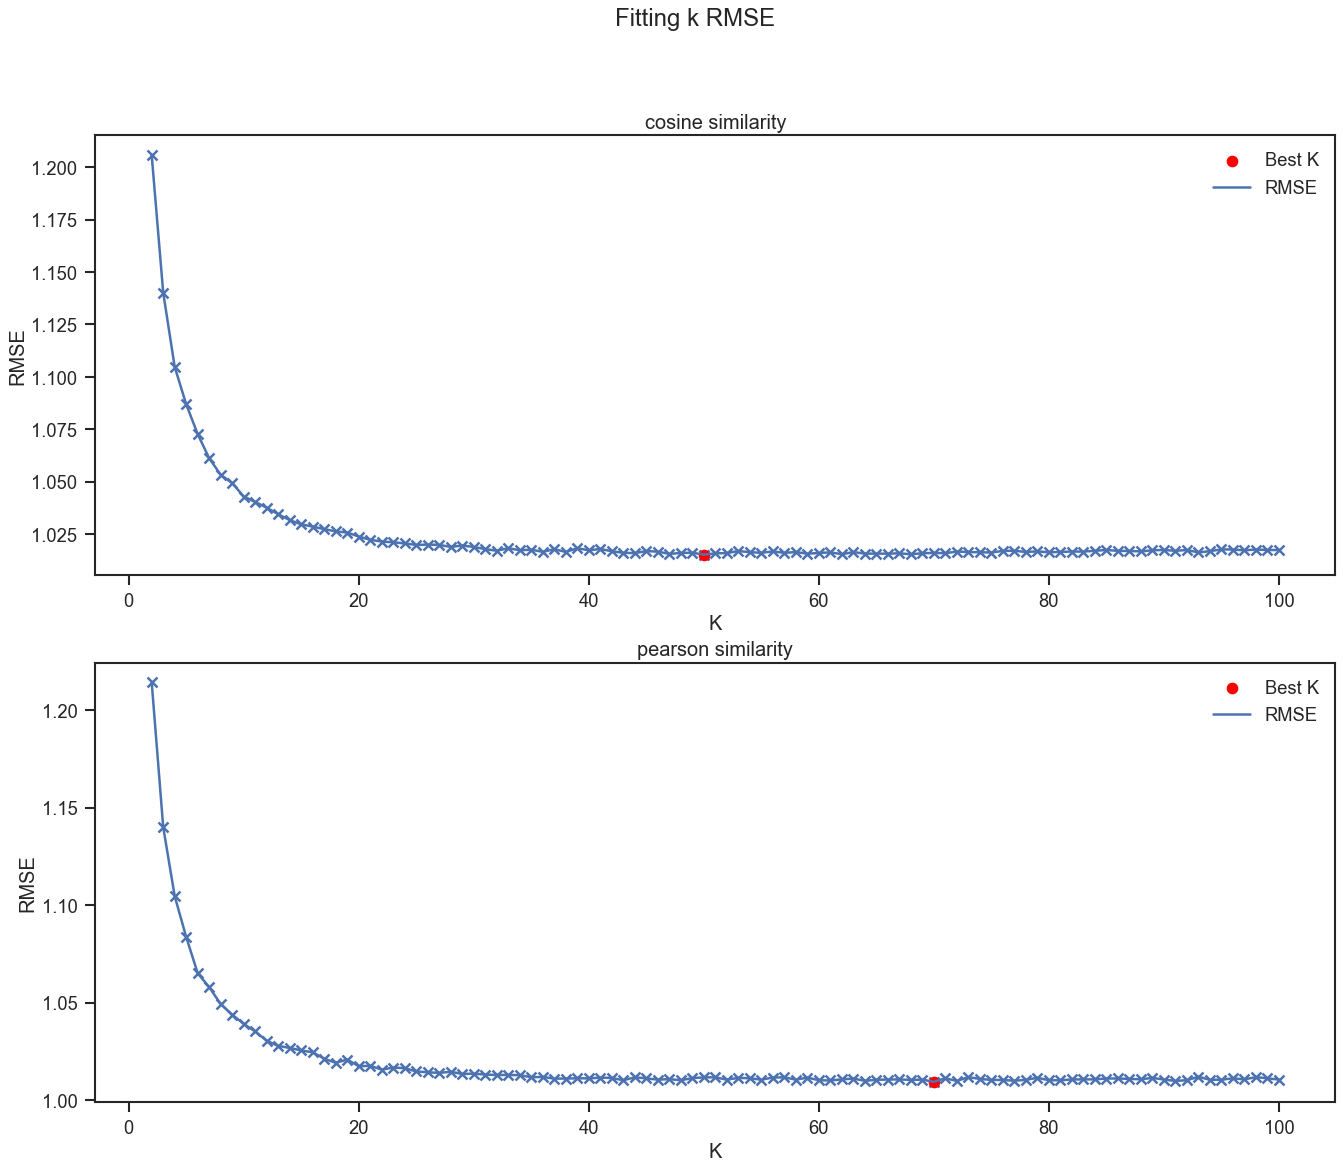

In [ ]:
i = 211
for sim in fitK:
    plt.subplot(i)
    plt.title(sim + " similarity")
    plt.scatter(fitK[sim].index, fitK[sim]["RMSE"], marker = "x")
    mn = minSeries(fitK[sim]["RMSE"])
    plt.scatter(mn[0], mn[1], marker = "o", color = "red", label = "Best K")
    fitK[sim]["RMSE"].plot()
    plt.ylabel("RMSE")
    plt.xlabel("K")
    plt.legend()
    i += 1
plt.suptitle("Fitting k RMSE")
saveImg("fitRMSE", "", sf)

## Riempimento delle delle matrici di rating

Quando è impossibile prevedere il rating lo sostituisco con la media dei rating fatti dallo user, queste medie le imposto con la stessa significatività delle previsioni

In [86]:
medieUS = data["data"].copy()
medieUS = medieUS.groupby("user id").mean()["rating"]
for us in medieUS.index:
    medieUS[us] = sign_pred(medieUS[us])

In [88]:

full_matrix = {}
n_us = len(data["user"].index)
s = len(data["user"].index) * len(data["item"].index)# rating totali

for sim in ["cosine", "pearson"]:
    full_matrix[sim] = matrix.copy()
    i = 0
    # Best K in base al valore di RMSE
    #k = minSeries(fitK[sim]["RMSE"])[0]
    if sim == "cosine":
        k = 50
    else:
        k = 70
    print("Similarity: " + sim + "\t K = " + str(k))
    algo = KNNBasic(k = k, sim_options = {'name': sim}, verbose = False)
    algo.fit(trainset)

    # Riempimento della matrice
    for us in data["user"].index:
        for it in data["item"].index:
            if np.isnan(full_matrix[sim].loc[us][it]):
                p = algo.predict(uid = str(us), iid = str(it))
                if not p.details["was_impossible"]:
                    full_matrix[sim].loc[us][it] = sign_pred(p.est)
                else:
                    full_matrix[sim].loc[us][it] = medieUS[us]
        
        # Percentuale di procedimento
        prc = (us / n_us) * 100
        if prc > i:
            i = int(prc)
            print(str(i) + "%", end = "\t")
            i += 1
    print("100%")
    print("Similarity: " + sim + "\t K = " + str(k))
    display(full_matrix[sim])

Similarity: cosine	 K = 50
0%	1%	2%	3%	4%	5%	6%	7%	8%	9%	10%	11%	12%	13%	14%	15%	16%	17%	18%	19%	20%	21%	22%	23%	24%	25%	26%	27%	28%	29%	30%	31%	32%	33%	34%	35%	36%	37%	38%	39%	40%	41%	42%	43%	44%	45%	46%	47%	48%	49%	50%	51%	52%	53%	54%	55%	56%	57%	58%	59%	60%	61%	62%	63%	64%	65%	66%	67%	68%	69%	70%	71%	72%	73%	74%	75%	76%	77%	78%	79%	80%	81%	82%	83%	84%	85%	86%	87%	88%	89%	90%	91%	92%	93%	94%	95%	96%	97%	98%	99%	100%
Similarity: cosine	 K = 50


movie id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user id,,,,,,,,,,,,,,,,,,,,,
1,5,3,4,3,3,5,4,1,5,3,...,3,4,3,2,3,1,3,2,3,3
2,4,3,3,4,3,3.5,4,4,4,2,...,3,4,3,2,3,1,3,2,3,3
3,4,3,3,3.5,3,3.5,4,4,4,4,...,3,4,3,2,3,1,3,2,3,3
4,4,3,3,4,3,3.5,4,4,4,4,...,3,4,3,2,3,1,3,2,3,3
5,4,3,3,4,3,3.5,4,4,4,4,...,3,4,3,2,3,1,3,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,4,3,3,4,3.5,3.5,4,4,5,4,...,3,4,3,2,3,1,3,2,3,3
940,4,3.5,3,2,3.5,3.5,4,5,3,4,...,3,4,3,2,3,1,3,2,3,3
941,5,3,3,3.5,3.5,3.5,4,4,4,4,...,3,4,3,2,3,1,3,2,3,3


Similarity: pearson	 K = 70
0%	1%	2%	3%	4%	5%	6%	7%	8%	9%	10%	11%	12%	13%	14%	15%	16%	17%	18%	19%	20%	21%	22%	23%	24%	25%	26%	27%	28%	29%	30%	31%	32%	33%	34%	35%	36%	37%	38%	39%	40%	41%	42%	43%	44%	45%	46%	47%	48%	49%	50%	51%	52%	53%	54%	55%	56%	57%	58%	59%	60%	61%	62%	63%	64%	65%	66%	67%	68%	69%	70%	71%	72%	73%	74%	75%	76%	77%	78%	79%	80%	81%	82%	83%	84%	85%	86%	87%	88%	89%	90%	91%	92%	93%	94%	95%	96%	97%	98%	99%	100%
Similarity: pearson	 K = 70


movie id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user id,,,,,,,,,,,,,,,,,,,,,
1,5,3,4,3,3,5,4,1,5,3,...,4.0,4,3,2,3,1,3,2,3,3
2,4,3,3,4,3,4,4,4,4,2,...,3,4.0,3,2,3,4.0,4.0,4.0,3,3
3,4,3,3,3.5,3.5,3,4,4,4,4,...,3,3.0,3,2,3.0,3.0,3.0,3.0,3,3.0
4,4,3,3,3.5,3,4,4,4,3.5,4,...,4.0,4,3,2,3,4.0,4.0,4.0,3,3
5,4,3,3,4,3,4,4,4,4,4,...,3.0,4,3,2,3,3.0,3.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,4,3,3,4,3,3.5,4,4,5,4,...,3,4.0,3,2,4.0,4.0,4.0,4.0,4.0,3
940,4,3,3,2,3,3.5,4,5,3,4,...,3.5,3.5,3,2,3,1,3,2,3,3
941,5,3,3,4,3,4,4,4,4,4,...,4.0,4.0,4.0,4.0,3,4.0,4.0,4.0,3,3


# Clustering

In [89]:
clusters = {}
for dis in ["eucledian", "cosine"]:
    clusters[dis] = pd.DataFrame(index = data["user"].index)
    clusters[dis]["mean"] = full_matrix["cosine"].mean(axis = 1)

## Elbow Method

In [ ]:
x = data["data"].iloc[:, [0]].values

wcss = []
dim = 11
for i in range(1, dim):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(x)
  wcss.append(km.inertia_)

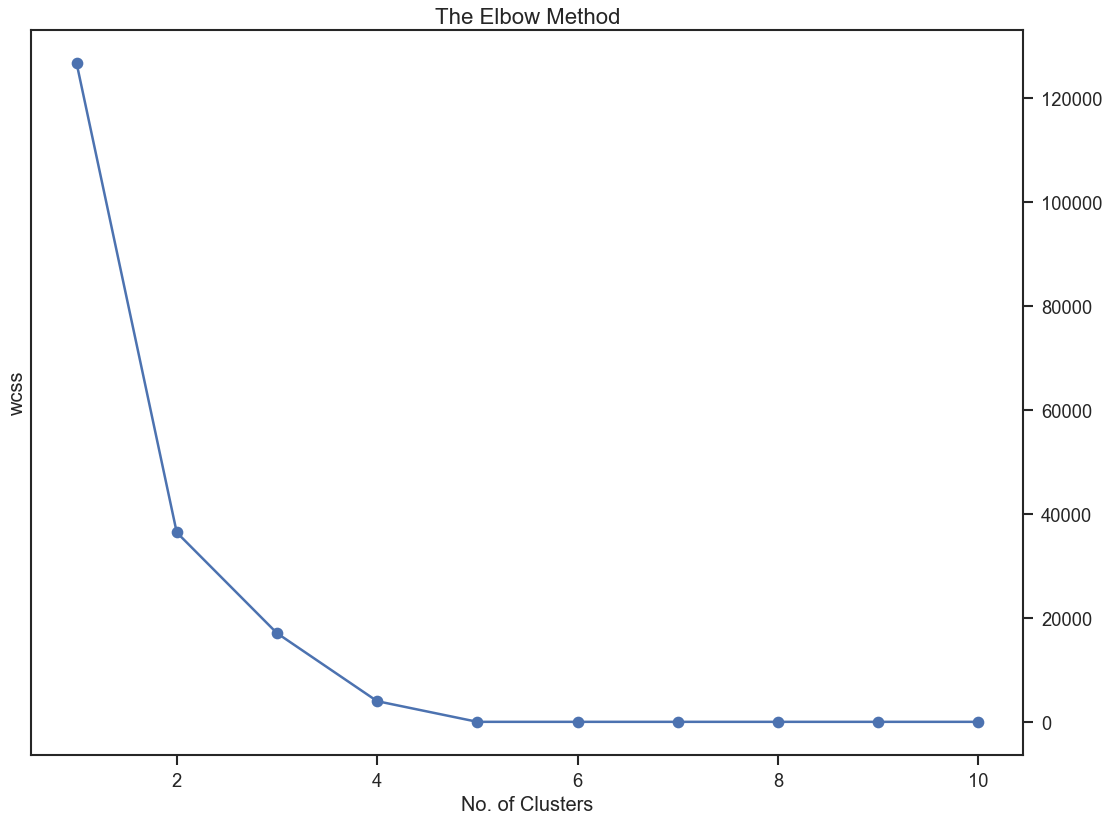

In [ ]:
plt.rcParams['figure.figsize'] = [16, 12]
plt.plot(range(1, dim), wcss)
plt.scatter(range(1, dim), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')

# Save
saveImg("elb", "Clustering", sf)

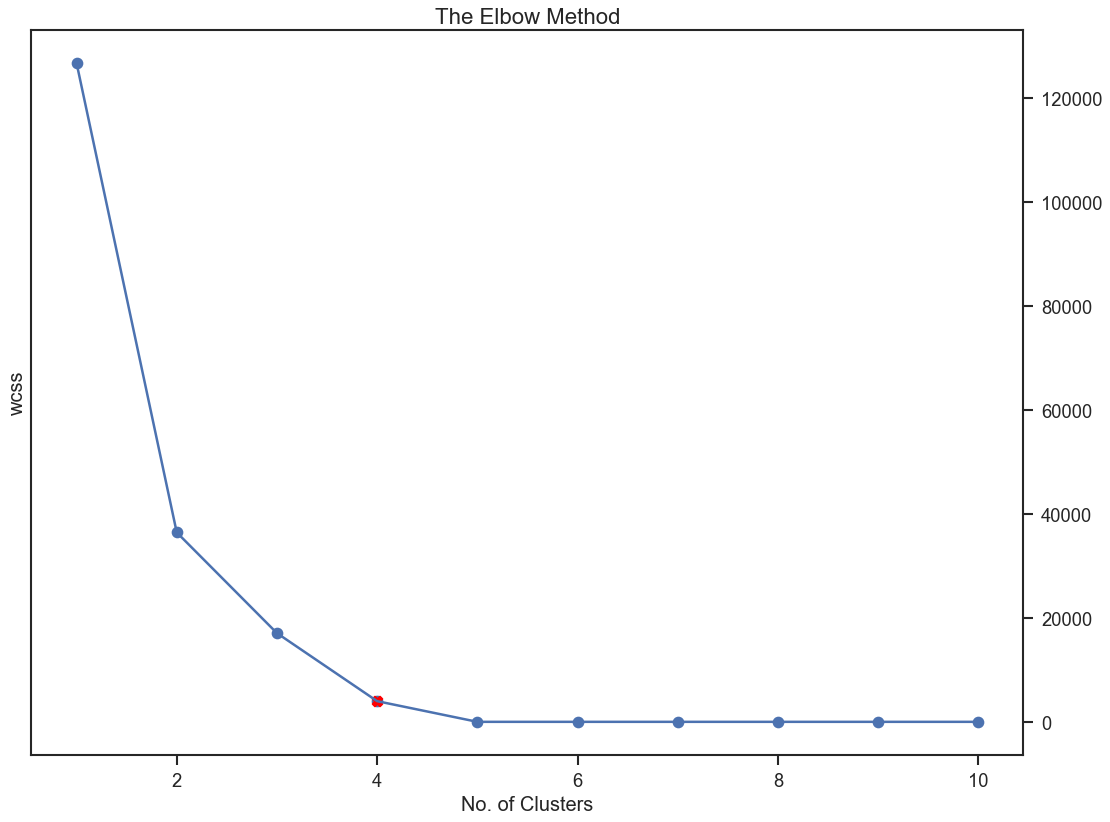

In [ ]:
plt.plot(range(1, 11), wcss)
plt.scatter(range(1, 11), wcss)
plt.scatter(4, wcss[3], marker = "X", color = "red")
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')

# Save
saveImg("elbM", "Clustering", sf)

## Distanza Euclidea

In [90]:
x = full_matrix["cosine"].values

In [91]:
kclustererEuc = KMeansClusterer(7, distance = euclidean_distance, repeats = 10)
eucl_clusters  = kclustererEuc.cluster(x, assign_clusters=True)
clusters["eucledian"]["Cluster Id"] = eucl_clusters
clusters["eucledian"]

,mean,Cluster Id
user id,,
1,3.118014,4
2,3.110880,4
3,3.084423,3
4,3.119501,4
5,3.063912,1
...,...,...
939,3.135850,5
940,3.105529,5
941,3.100178,4


In [92]:
clusters["eucledian"].groupby("Cluster Id")["mean"].count()

Cluster Id
0      1
1     73
2     97
3    144
4    374
5    253
6      1
Name: mean, dtype: int64

Text(0.5, 1.0, 'Rating medio per Cluster')

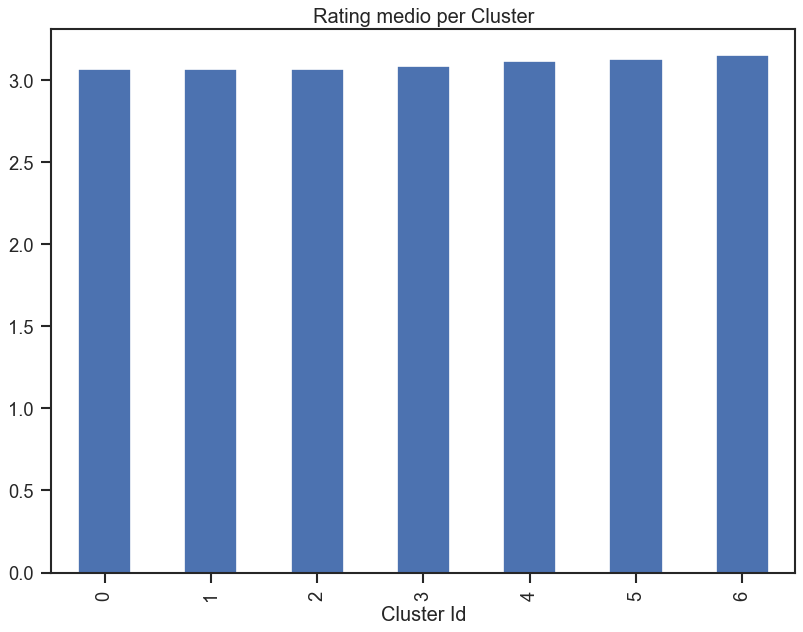

In [94]:
plt.rcParams['figure.figsize'] = [12, 9]
medie = clusters["eucledian"].groupby("Cluster Id")["mean"].mean()
medie.plot.bar(legend = None)
plt.title("Rating medio per Cluster")

# Save
#saveImg("mean_eucledian", "Clustering", sf)

In [95]:
medie

Cluster Id
0    3.064804
1    3.065366
2    3.068362
3    3.086007
4    3.113969
5    3.128988
6    3.152497
Name: mean, dtype: float64

## Cosine distance

In [96]:
kclusterer = KMeansClusterer(7, distance = cluster.util.cosine_distance, repeats = 10)
assigned_clusters = kclusterer.cluster(x, assign_clusters=True)
clusters["cosine"]["Cluster Id"] = assigned_clusters
clusters["cosine"]

,mean,Cluster Id
user id,,
1,3.118014,3
2,3.110880,3
3,3.084423,1
4,3.119501,4
5,3.063912,3
...,...,...
939,3.135850,6
940,3.105529,4
941,3.100178,4


In [97]:
clusters["cosine"].groupby("Cluster Id")["mean"].count()

Cluster Id
0      2
1     95
2     52
3    260
4    400
5      1
6    133
Name: mean, dtype: int64

Text(0.5, 1.0, 'Rating medio per Cluster')

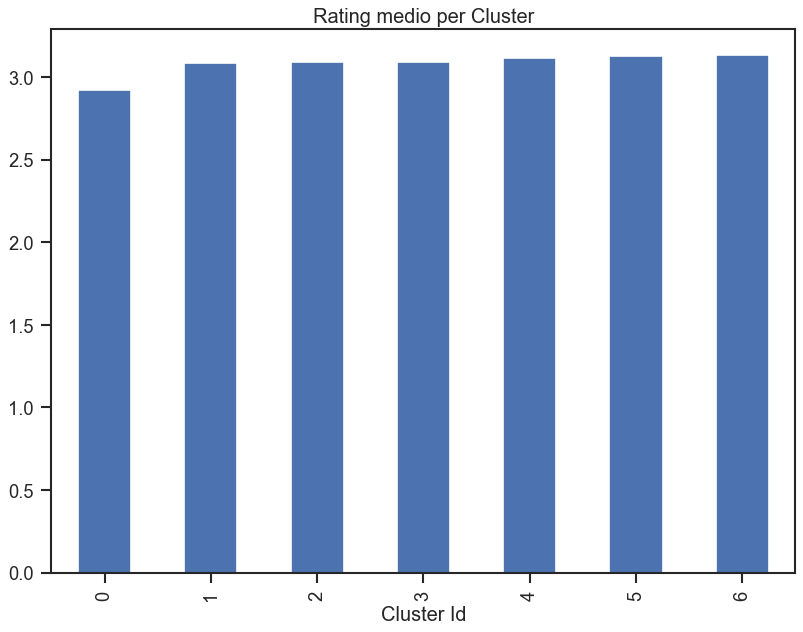

In [98]:
medie = clusters["cosine"].groupby("Cluster Id")["mean"].mean()
medie.plot.bar(legend = None)
plt.title("Rating medio per Cluster")

# Save
#saveImg("mean_cosine", "Clustering", sf)

In [99]:
medie

Cluster Id
0    2.921671
1    3.084470
2    3.089728
3    3.090840
4    3.112681
5    3.124554
6    3.134695
Name: mean, dtype: float64

In [ ]:
dist_cosine = pd.DataFrame(cosine_similarity(full_matrix["cosine"]),
 index = full_matrix["cosine"].index, columns=full_matrix["cosine"].index)
dist_cosine

user id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.990905,0.989024,0.990515,0.984825,0.987314,0.981262,0.991258,0.990808,0.989748,...,0.987137,0.988542,0.989309,0.990192,0.987681,0.988629,0.988454,0.990703,0.989051,0.982650
2,0.990905,1.000000,0.995088,0.996439,0.989669,0.992606,0.987388,0.996480,0.996466,0.995980,...,0.993428,0.995741,0.994834,0.996731,0.993648,0.995159,0.994212,0.996587,0.996029,0.989977
3,0.989024,0.995088,1.000000,0.994810,0.988221,0.990986,0.985589,0.994482,0.995573,0.994349,...,0.991986,0.994546,0.992958,0.995148,0.992132,0.993881,0.993027,0.995528,0.994236,0.988780
4,0.990515,0.996439,0.994810,1.000000,0.989766,0.991546,0.986100,0.996513,0.996925,0.995759,...,0.993339,0.996028,0.994252,0.995657,0.993702,0.995060,0.995023,0.996928,0.996185,0.989875
5,0.984825,0.989669,0.988221,0.989766,1.000000,0.985983,0.979324,0.989331,0.989231,0.988338,...,0.986706,0.988141,0.987337,0.989360,0.986185,0.987633,0.987383,0.989897,0.988298,0.984885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.988629,0.995159,0.993881,0.995060,0.987633,0.989540,0.985447,0.995173,0.995907,0.994644,...,0.992665,0.996372,0.992914,0.994392,0.993067,1.000000,0.993714,0.996133,0.995279,0.988467
940,0.988454,0.994212,0.993027,0.995023,0.987383,0.989722,0.984651,0.994574,0.995172,0.994435,...,0.991762,0.994824,0.992005,0.993865,0.991779,0.993714,1.000000,0.994971,0.994697,0.988586
941,0.990703,0.996587,0.995528,0.996928,0.989897,0.992097,0.986915,0.996437,0.997395,0.996083,...,0.993491,0.996756,0.994548,0.996614,0.993788,0.996133,0.994971,1.000000,0.996369,0.990216
